In [1]:
import pandas as pd
import numpy as np
import pymrmr as mr
import missingno as msno
import featuretools as ft
import matplotlib.pyplot as plt
import seaborn as sns

import shap

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import middleware.cost_of_selling_helper as cosh
import middleware.modelling_cos as mc

from mrmr import mrmr_regression

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Tick data level 1
df1 = pd.read_csv('data/ABC_Tick_Data/ABC_Level_One_Tick_Data.csv')
#tick data level 2
df2 = pd.read_csv('data/ABC_Tick_Data/ABC_Level_Two_Tick_Data.csv')

print(df1.shape)
print(df2.shape)

(1023, 14)
(47343, 43)


In [3]:
#show all columns
pd.set_option('display.max_column', None)

In [4]:
df1.head(9)

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078
5,2018-01-04 13:00:00+00:00,ABC,54.190909,54.231818,53.927223,54.145455,53.953609,54.172521,501,330906.18180,2.169049e+09,2020-01-02 13:00:12.497971+00:00,2020-01-02 13:59:48.794612+00:00,0.011275
6,2018-01-04 14:00:00+00:00,ABC,54.163636,54.236364,54.118182,54.236364,54.169052,54.169997,1176,84678.54545,5.550314e+08,2020-01-02 14:00:03.334641+00:00,2020-01-02 14:59:47.127785+00:00,0.011378
7,2018-01-04 15:00:00+00:00,ABC,54.218182,54.240909,53.958382,54.127273,54.069545,54.081672,1851,166987.81820,1.092749e+09,2020-01-02 15:00:05.156280+00:00,2020-01-02 15:59:55.230026+00:00,0.010962
8,2018-01-04 16:00:00+00:00,ABC,54.118182,54.222727,54.100000,54.100000,54.108533,54.162071,825,453010.72730,2.968856e+09,2020-01-02 16:00:01.942575+00:00,2020-01-02 16:35:12.083111+00:00,-0.286058


In [5]:
df2.head()

,Instrument_Code,Time_Minute,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,L1_AskSize,L2_AskSize,L3_AskSize,L4_AskSize,L5_AskSize,L6_AskSize,L7_AskSize,L8_AskSize,L9_AskSize,L10_AskSize,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance
0,ABC,05/02/2018 03:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABC,05/02/2018 05:00,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,254.545455,933.636364,6545.454545,4000.000000,5454.545455,1636.363636,3636.363636,1258.090909,3862.909091,5927.272727,227.272727,49.454545,48.636364,48.545455,48.272727,48.181818,47.636364,47.090909,46.727273,45.818182,45.454545,52.000000,53.545455,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752
2,ABC,05/02/2018 07:50,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,26179.818180,59239.545450,34885.454550,26315.090910,32233.272730,31014.181820,43954.454550,81725.818180,117662.727300,116329.090900,86198.090910,55.022570,50.054310,49.828490,49.736721,49.532502,49.244538,49.279725,49.553179,48.996679,49.004294,47.064491,49.679720,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581
3,ABC,05/02/2018 07:51,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,809.090909,5262.272727,2229.545455,3056.818182,3667.727273,857.090909,3147.272727,4054.090909,5870.636364,14547.727270,14547.727270,56.181818,52.659897,51.947770,51.656319,50.950413,50.858586,50.434343,50.010611,49.997818,49.692543,44.145455,47.663636,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814
4,ABC,05/02/2018 07:52,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,27164.727270,17342.090910,6688.636364,9170.454545,2727.272727,2337.272727,20098.636360,257.727273,23089.000000,27995.000000,29991.909090,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.098007,50.027326,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419


#### Note 1
Level 1 data is often enough for long term investor that don't care too much about price changing slightly. 
It provides basic price data for a security including the best bid and ask price and size an each side (highest bid price (best price someone is willing to pay) and lowest ask price (lowest posted price someone is willing to sell))
Provides investors with the highest bid and lowest ask price for an individual stock

Level 2 can be used to gather more information to capture small gains. It adds market depth
It show market depth

Level 2 data will be aggregated to hourly level and merged with Level 1 to show more granularity

### Check for missing Duplicates

In [6]:
#Date time for every entry should be unique 
cosh.duplicates(df1, df2)

Level 1 Data timestamp is unique: True
Level 2 Data timestamp is unique: True


##### Note 2

Data in both level 1 and 2 tick data are unique, no duplicates

### Check for Missing data

<AxesSubplot:>

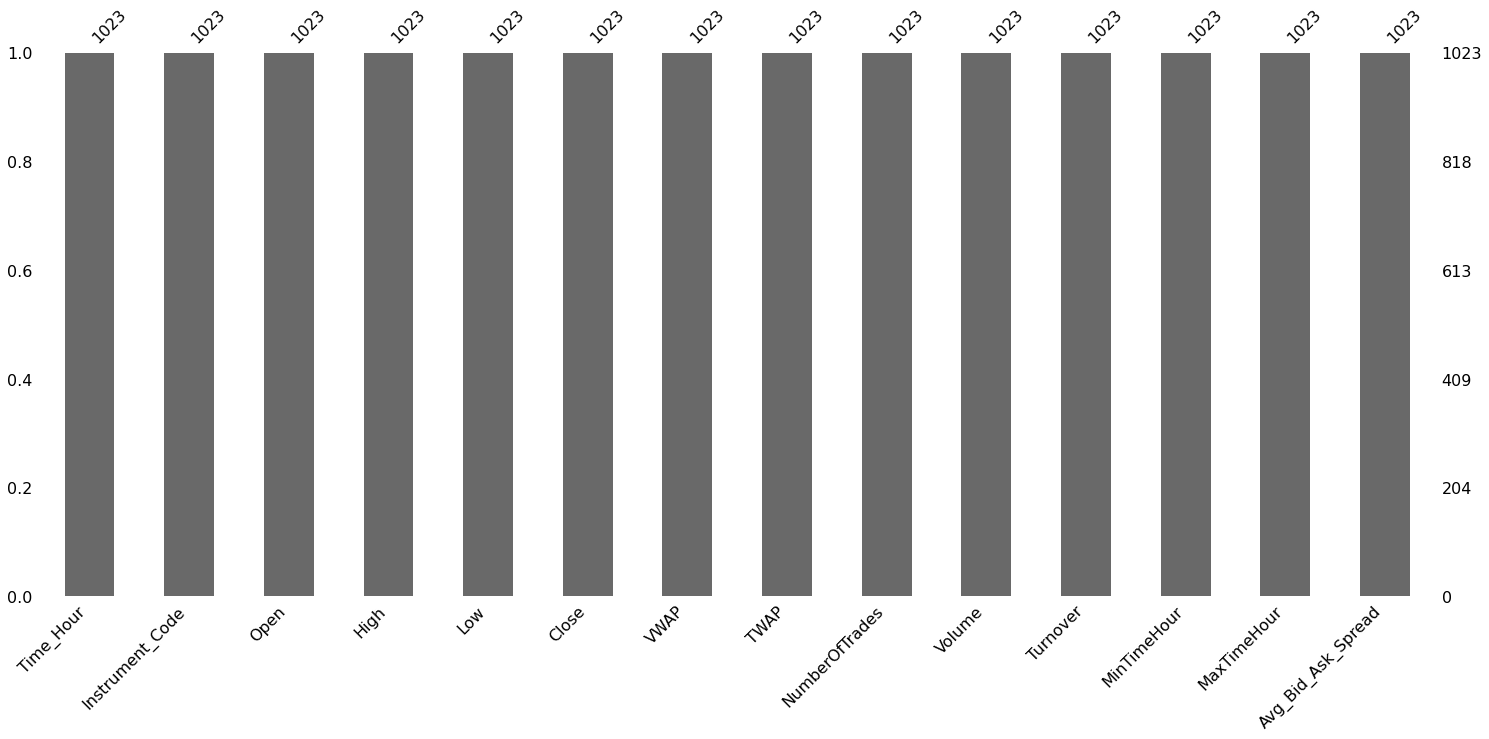

In [7]:
#For Level 1 tick data
cosh.missing_viz_bar(df1)

<AxesSubplot:>

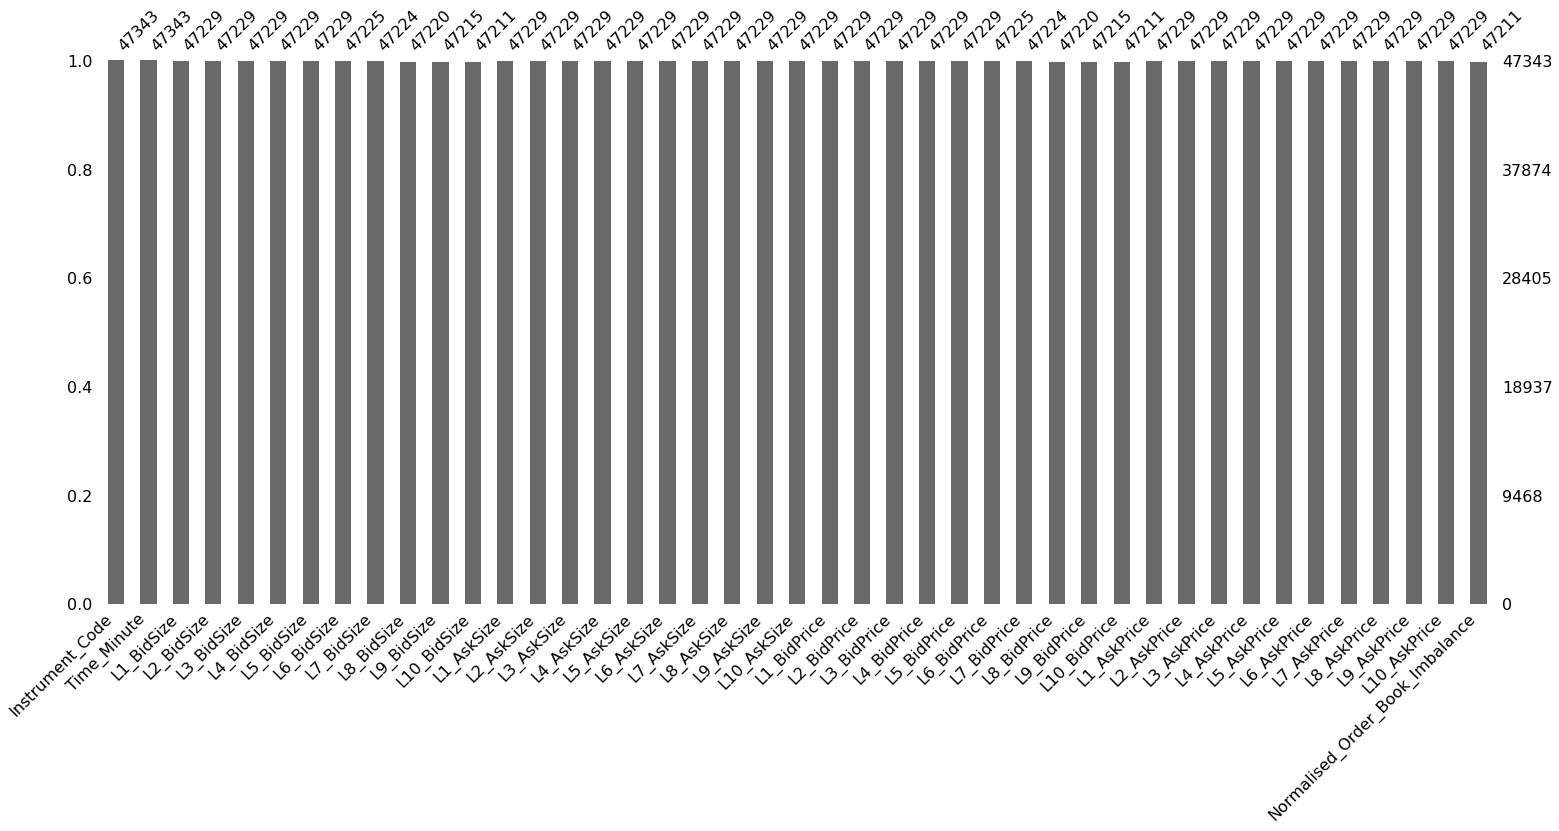

In [8]:
#For Level 2 tick data
cosh.missing_viz_bar(df2)

##### Note 3 
Level 1 tick data has no missing value
Level 2 tick data has a number of missing values 

<AxesSubplot:>

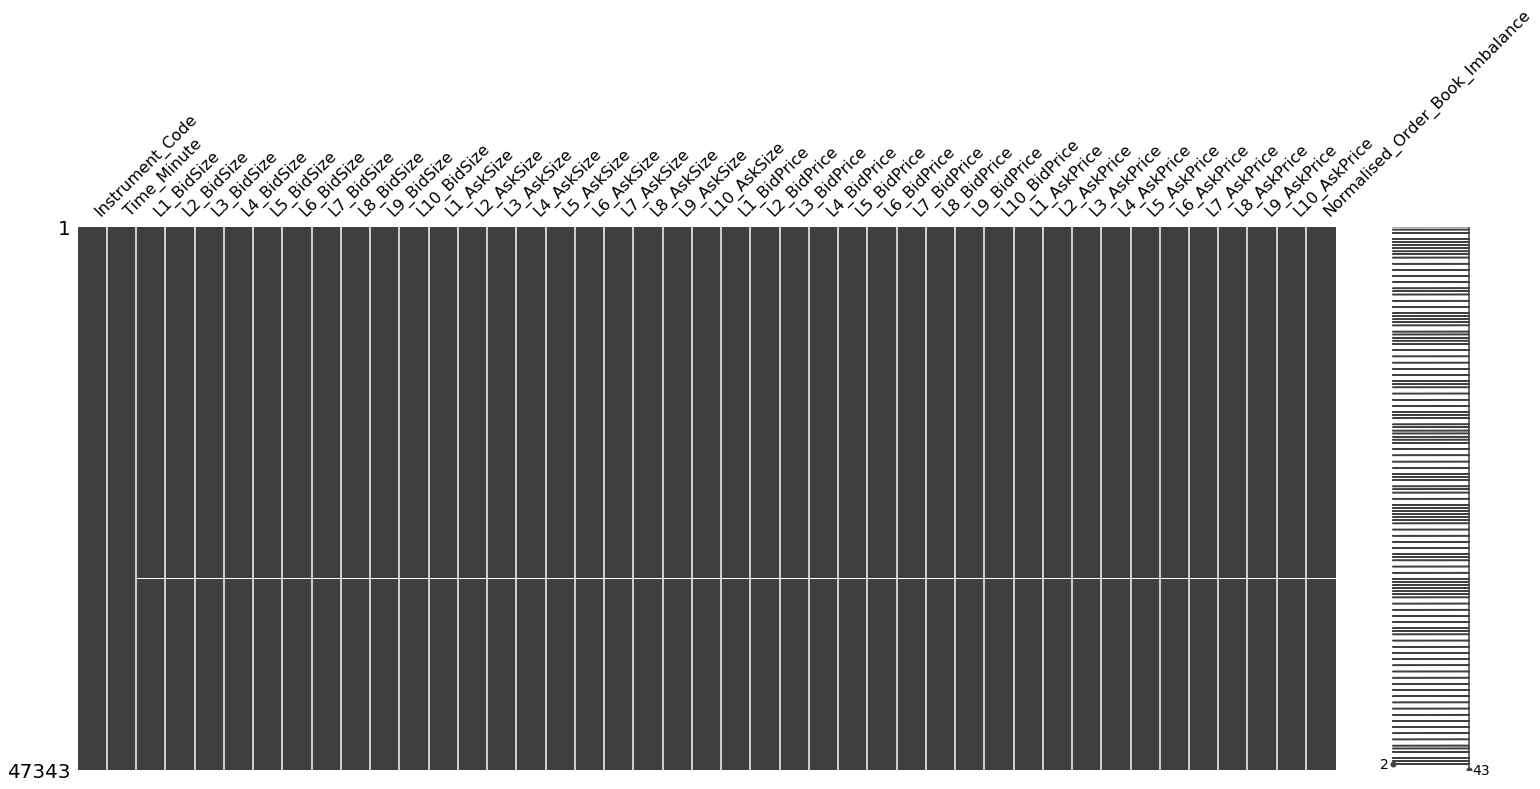

In [9]:
#Understand the type of missing values in level 2 tick data
cosh.missing_map(df2)

In [10]:
#Understand the percentage of missing values
cosh.missing_stats(df2)

,MIssings Values,% of Total Value
Normalised_Order_Book_Imbalance,132.0,0.3
L10_BidSize,132.0,0.3
L10_BidPrice,132.0,0.3
L9_BidSize,128.0,0.3
L9_BidPrice,128.0,0.3
L8_BidPrice,123.0,0.3
L8_BidSize,123.0,0.3
L7_BidPrice,119.0,0.3
L7_BidSize,119.0,0.3
L6_BidPrice,118.0,0.2


#### Note 4
Missing values appear to be at random but some rows have no bid and ask as indicated by the white lines in cell 9's graph. However there are few things to consider

1. There has to be an ask and bid for a sale of ABC security to happen meaning there should be at least L1 bid and ask. Where there is no L1 bid and ask, I would assume there was no trade that minute and delete the timestamp entry.

2. L1 data gives the best security price for the sale (that is L1 has highest bid price and lowest Ask price).

3. Price and size go hand in hand

In [11]:
#Delete entries without L1 data
print(df2.shape)
df2a = df2.dropna(subset=['L1_BidPrice', 'L1_AskSize', 'L1_BidSize', 'L1_AskPrice'])
print(df2a.shape)

(47343, 43)
(47229, 43)


### Feature Enginnering

In [12]:
#Understand the data a bit more
df2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47229 entries, 1 to 47342
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Instrument_Code                  47229 non-null  object 
 1   Time_Minute                      47229 non-null  object 
 2   L1_BidSize                       47229 non-null  float64
 3   L2_BidSize                       47229 non-null  float64
 4   L3_BidSize                       47229 non-null  float64
 5   L4_BidSize                       47229 non-null  float64
 6   L5_BidSize                       47229 non-null  float64
 7   L6_BidSize                       47225 non-null  float64
 8   L7_BidSize                       47224 non-null  float64
 9   L8_BidSize                       47220 non-null  float64
 10  L9_BidSize                       47215 non-null  float64
 11  L10_BidSize                      47211 non-null  float64
 12  L1_AskSize        

#### Note 5

Data value type is as expected except for the Time_Minute variable which needs to be datetime

In [13]:
#Convert Time_Minute to datetime
df2a['Time_Minute'] = pd.to_datetime(df2a['Time_Minute'], format='%d/%m/%Y %H:%M')
df2a['Time_Minute'].dtypes

dtype('<M8[ns]')

In [14]:
df2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47229 entries, 1 to 47342
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Instrument_Code                  47229 non-null  object        
 1   Time_Minute                      47229 non-null  datetime64[ns]
 2   L1_BidSize                       47229 non-null  float64       
 3   L2_BidSize                       47229 non-null  float64       
 4   L3_BidSize                       47229 non-null  float64       
 5   L4_BidSize                       47229 non-null  float64       
 6   L5_BidSize                       47229 non-null  float64       
 7   L6_BidSize                       47225 non-null  float64       
 8   L7_BidSize                       47224 non-null  float64       
 9   L8_BidSize                       47220 non-null  float64       
 10  L9_BidSize                       47215 non-null  float64  

In [15]:
df2a.head()

,Instrument_Code,Time_Minute,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,L1_AskSize,L2_AskSize,L3_AskSize,L4_AskSize,L5_AskSize,L6_AskSize,L7_AskSize,L8_AskSize,L9_AskSize,L10_AskSize,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance
1,ABC,2018-02-05 05:00:00,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,254.545455,933.636364,6545.454545,4000.000000,5454.545455,1636.363636,3636.363636,1258.090909,3862.909091,5927.272727,227.272727,49.454545,48.636364,48.545455,48.272727,48.181818,47.636364,47.090909,46.727273,45.818182,45.454545,52.000000,53.545455,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752
2,ABC,2018-02-05 07:50:00,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,26179.818180,59239.545450,34885.454550,26315.090910,32233.272730,31014.181820,43954.454550,81725.818180,117662.727300,116329.090900,86198.090910,55.022570,50.054310,49.828490,49.736721,49.532502,49.244538,49.279725,49.553179,48.996679,49.004294,47.064491,49.679720,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581
3,ABC,2018-02-05 07:51:00,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,809.090909,5262.272727,2229.545455,3056.818182,3667.727273,857.090909,3147.272727,4054.090909,5870.636364,14547.727270,14547.727270,56.181818,52.659897,51.947770,51.656319,50.950413,50.858586,50.434343,50.010611,49.997818,49.692543,44.145455,47.663636,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814
4,ABC,2018-02-05 07:52:00,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,27164.727270,17342.090910,6688.636364,9170.454545,2727.272727,2337.272727,20098.636360,257.727273,23089.000000,27995.000000,29991.909090,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.098007,50.027326,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419
5,ABC,2018-02-05 07:53:00,2072.090909,1363.636364,30.909091,22.727273,2.272727,90.909091,45.454545,22.727273,2727.272727,2272.727273,1175.181818,445.909091,619.727273,181.818182,155.818182,1339.909091,17.181818,912.727273,912.636364,912.636364,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,0.129023


In [16]:
print(df2a.shape)

(47229, 43)


In [17]:
#Create date related features for month, day and hour. This would be used to create ID for each entry 
df2a = cosh.split_time(df2a)
print(df2a.shape)

(47229, 46)


In [18]:
df2a.head(15)

,Instrument_Code,Time_Minute,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,L1_AskSize,L2_AskSize,L3_AskSize,L4_AskSize,L5_AskSize,L6_AskSize,L7_AskSize,L8_AskSize,L9_AskSize,L10_AskSize,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance,month,day,hour
1,ABC,2018-02-05 05:00:00,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,2.545455e+02,9.336364e+02,6545.454545,4000.000000,5454.545455,1636.363636,3636.363636,1258.090909,3862.909091,5927.272727,227.272727,49.454545,48.636364,48.545455,48.272727,48.181818,47.636364,47.090909,46.727273,45.818182,45.454545,52.000000,53.545455,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752,2,5,5
2,ABC,2018-02-05 07:50:00,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,2.617982e+04,5.923955e+04,34885.454550,26315.090910,32233.272730,31014.181820,43954.454550,81725.818180,117662.727300,116329.090900,86198.090910,55.022570,50.054310,49.828490,49.736721,49.532502,49.244538,49.279725,49.553179,48.996679,49.004294,47.064491,49.679720,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581,2,5,7
3,ABC,2018-02-05 07:51:00,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,8.090909e+02,5.262273e+03,2229.545455,3056.818182,3667.727273,857.090909,3147.272727,4054.090909,5870.636364,14547.727270,14547.727270,56.181818,52.659897,51.947770,51.656319,50.950413,50.858586,50.434343,50.010611,49.997818,49.692543,44.145455,47.663636,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814,2,5,7
4,ABC,2018-02-05 07:52:00,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,2.716473e+04,1.734209e+04,6688.636364,9170.454545,2727.272727,2337.272727,20098.636360,257.727273,23089.000000,27995.000000,29991.909090,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.098007,50.027326,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419,2,5,7
5,ABC,2018-02-05 07:53:00,2072.090909,1363.636364,30.909091,22.727273,2.272727,90.909091,45.454545,22.727273,2727.272727,2.272727e+03,1.175182e+03,445.909091,619.727273,181.818182,155.818182,1339.909091,17.181818,912.727273,912.636364,912.636364,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,0.129023,2,5,7
6,ABC,2018-02-05 07:54:00,23673.363640,15000.000000,340.000000,250.000000,25.000000,1000.000000,500.000000,250.000000,30000.000000,2.500000e+04,6.094145e+04,4905.000000,8860.000000,6790.000000,1974.000000,2898.090909,13416.272730,1084.545455,19449.000000,17566.636360,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.120776,49.588510,50.124534,50.163660,50.403688,50.447587,50.493271,-0.178890,2,5,7
7,ABC,2018-02-05 07:55:00,58845.818180,20454.545450,463.636364,340.909091,34.090909,1363.636364,8632.909091,520.000000,14426.545450,1.760391e+04,1.405835e+05,6688.636364,12081.818180,9912.272727,2727.272727,5941.636364,3521.363636,18775.909090,3035.090909,31363.545450,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.407708,50.134625,50.089912,44.145455,47.663636,48.663636,49.109091,49.545455,49.674841,50.118582,50.163653,50.424560,50.420685,-0.313293,2,5,7
8,ABC,2018-02-05 07:56:00,35625.545450,12272.727270,278.181818,204.545455,20.454545,

In [19]:
#Create a Date_Hour_ID coloumn. This Column will be used as an ID to recognise trades in a month, day and hour 
df2a['Time_Hour_ID'] = df2a['month'].astype(str) + df2a['day'].astype(str) + df2a['hour'].astype(str)

In [20]:
df2a.head(15)

,Instrument_Code,Time_Minute,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,L1_AskSize,L2_AskSize,L3_AskSize,L4_AskSize,L5_AskSize,L6_AskSize,L7_AskSize,L8_AskSize,L9_AskSize,L10_AskSize,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance,month,day,hour,Time_Hour_ID
1,ABC,2018-02-05 05:00:00,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,2.545455e+02,9.336364e+02,6545.454545,4000.000000,5454.545455,1636.363636,3636.363636,1258.090909,3862.909091,5927.272727,227.272727,49.454545,48.636364,48.545455,48.272727,48.181818,47.636364,47.090909,46.727273,45.818182,45.454545,52.000000,53.545455,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752,2,5,5,255
2,ABC,2018-02-05 07:50:00,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,2.617982e+04,5.923955e+04,34885.454550,26315.090910,32233.272730,31014.181820,43954.454550,81725.818180,117662.727300,116329.090900,86198.090910,55.022570,50.054310,49.828490,49.736721,49.532502,49.244538,49.279725,49.553179,48.996679,49.004294,47.064491,49.679720,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581,2,5,7,257
3,ABC,2018-02-05 07:51:00,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,8.090909e+02,5.262273e+03,2229.545455,3056.818182,3667.727273,857.090909,3147.272727,4054.090909,5870.636364,14547.727270,14547.727270,56.181818,52.659897,51.947770,51.656319,50.950413,50.858586,50.434343,50.010611,49.997818,49.692543,44.145455,47.663636,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814,2,5,7,257
4,ABC,2018-02-05 07:52:00,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,2.716473e+04,1.734209e+04,6688.636364,9170.454545,2727.272727,2337.272727,20098.636360,257.727273,23089.000000,27995.000000,29991.909090,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.098007,50.027326,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419,2,5,7,257
5,ABC,2018-02-05 07:53:00,2072.090909,1363.636364,30.909091,22.727273,2.272727,90.909091,45.454545,22.727273,2727.272727,2.272727e+03,1.175182e+03,445.909091,619.727273,181.818182,155.818182,1339.909091,17.181818,912.727273,912.636364,912.636364,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,0.129023,2,5,7,257
6,ABC,2018-02-05 07:54:00,23673.363640,15000.000000,340.000000,250.000000,25.000000,1000.000000,500.000000,250.000000,30000.000000,2.500000e+04,6.094145e+04,4905.000000,8860.000000,6790.000000,1974.000000,2898.090909,13416.272730,1084.545455,19449.000000,17566.636360,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.120776,49.588510,50.124534,50.163660,50.403688,50.447587,50.493271,-0.178890,2,5,7,257
7,ABC,2018-02-05 07:55:00,58845.818180,20454.545450,463.636364,340.909091,34.090909,1363.636364,8632.909091,520.000000,14426.545450,1.760391e+04,1.405835e+05,6688.636364,12081.818180,9912.272727,2727.272727,5941.636364,3521.363636,18775.909090,3035.090909,31363.545450,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.407708,50.134625,50.089912,44.145455,47.663636,48.663636,49.109091,49.545455,49.674841,50.118582,50.163653,50.424560,50.420685,-0.313293,2,5,7,257
8,ABC,2018-02-05 07:56:00,35625.545450,1227

In [21]:
df2a.Time_Hour_ID.dtypes

dtype('O')

In [22]:
#Cnnvert new created ID dtype to interger from object
df2a['Time_Hour_ID'] = df2a['Time_Hour_ID'].astype(str).astype(int)
print(df2a.Time_Hour_ID.dtypes)

int32


#### Note 6
Now I have an ID which represents the data at hour level. Data from the same hour of a particular day of the month will have the same unique ID

I will do the same for df1 -level 1 tick data later in the process and use this ID to merge both datasets

In [23]:
#remove the created month, day and time data used in level 2 tick data to create the Time_Hour ID
df3 = df2a.drop(['Time_Minute','Instrument_Code','month', 'day', 'hour'], 1)
df3.head()

,L1_BidSize,L2_BidSize,L3_BidSize,L4_BidSize,L5_BidSize,L6_BidSize,L7_BidSize,L8_BidSize,L9_BidSize,L10_BidSize,L1_AskSize,L2_AskSize,L3_AskSize,L4_AskSize,L5_AskSize,L6_AskSize,L7_AskSize,L8_AskSize,L9_AskSize,L10_AskSize,L1_BidPrice,L2_BidPrice,L3_BidPrice,L4_BidPrice,L5_BidPrice,L6_BidPrice,L7_BidPrice,L8_BidPrice,L9_BidPrice,L10_BidPrice,L1_AskPrice,L2_AskPrice,L3_AskPrice,L4_AskPrice,L5_AskPrice,L6_AskPrice,L7_AskPrice,L8_AskPrice,L9_AskPrice,L10_AskPrice,Normalised_Order_Book_Imbalance,Time_Hour_ID
1,1045.454545,1000.000000,954.545455,1090.909091,5181.818182,818.181818,772.727273,727.272727,681.818182,254.545455,933.636364,6545.454545,4000.000000,5454.545455,1636.363636,3636.363636,1258.090909,3862.909091,5927.272727,227.272727,49.454545,48.636364,48.545455,48.272727,48.181818,47.636364,47.090909,46.727273,45.818182,45.454545,52.000000,53.545455,54.454545,54.727273,54.772727,55.363636,55.727273,56.363636,57.272727,57.545455,0.207752,255
2,137155.000000,13579.818180,19539.636360,20160.545450,39737.636360,47180.545450,43057.272730,50232.000000,41045.818180,26179.818180,59239.545450,34885.454550,26315.090910,32233.272730,31014.181820,43954.454550,81725.818180,117662.727300,116329.090900,86198.090910,55.022570,50.054310,49.828490,49.736721,49.532502,49.244538,49.279725,49.553179,48.996679,49.004294,47.064491,49.679720,50.505977,50.928170,51.371194,51.366781,50.976629,50.977098,51.041609,51.660209,-0.179581,257
3,15027.363640,5485.454545,146.363636,93.181818,100.000000,409.090909,204.545455,2336.545455,9091.636364,809.090909,5262.272727,2229.545455,3056.818182,3667.727273,857.090909,3147.272727,4054.090909,5870.636364,14547.727270,14547.727270,56.181818,52.659897,51.947770,51.656319,50.950413,50.858586,50.434343,50.010611,49.997818,49.692543,44.145455,47.663636,48.663636,49.152354,49.743781,50.152834,50.163790,50.443140,50.463636,50.509091,-0.258814,257
4,42198.090910,20454.545450,463.636364,340.909091,34.090909,1363.636364,681.818182,340.909091,39464.181820,27164.727270,17342.090910,6688.636364,9170.454545,2727.272727,2337.272727,20098.636360,257.727273,23089.000000,27995.000000,29991.909090,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.098007,50.027326,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,-0.026419,257
5,2072.090909,1363.636364,30.909091,22.727273,2.272727,90.909091,45.454545,22.727273,2727.272727,2272.727273,1175.181818,445.909091,619.727273,181.818182,155.818182,1339.909091,17.181818,912.727273,912.636364,912.636364,56.181818,52.663636,52.000000,51.663636,51.363636,50.909091,50.454545,50.272727,50.118182,50.054545,44.145455,47.663636,48.663636,49.545455,50.090909,50.163636,50.181818,50.445455,50.490909,50.536364,0.129023,257


In [24]:
df3.shape

(47229, 42)

In [25]:
#Create new features and aggregated to hourly level
df4 = cosh.feature_creation(df3)
print(df4.shape)

(1049, 211)


In [26]:
df4.head()

,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice_std,NEW_L3_BidSize_std,NEW_L4_BidSize_std,NEW_L5_AskSize_std,NEW_L2_AskSize_std,NEW_L10_BidSize_s

In [27]:
df4 = df4.reset_index()
print(df4.shape)

(1049, 212)


In [28]:
df4.head()

,Time_Hour_ID,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice_std,NEW_L3_BidSize_std,NEW_L4_BidSize_std,NEW_L5_AskSize_std,NEW_L2_AskSize_std,NEW_

##### Preparing Level 1 tick data

In [29]:
#Get df1 dataframe ready
df1.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078


In [30]:
df1.dtypes

Time_Hour              object
Instrument_Code        object
Open                  float64
High                  float64
Low                   float64
Close                 float64
VWAP                  float64
TWAP                  float64
NumberOfTrades          int64
Volume                float64
Turnover              float64
MinTimeHour            object
MaxTimeHour            object
Avg_Bid_Ask_Spread    float64
dtype: object

In [31]:
#Convert Time_Minute to datetime
df1['Time_Hour'] = pd.to_datetime(df1['Time_Hour'], infer_datetime_format=True)
df1['Time_Hour'].dtypes

datetime64[ns, UTC]

In [32]:
# Create hour ID for level 1 tick data
df1['month'] = df1['Time_Hour'].dt.month
df1['day'] = df1['Time_Hour'].dt.day
df1['hour'] = df1['Time_Hour'].dt.hour
df1['day_of_week'] = df1['Time_Hour'].dt.dayofweek

In [33]:
df1.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,month,day,hour,day_of_week
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760,1,4,8,3
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481,1,4,9,3
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557,1,4,10,3
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537,1,4,11,3
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078,1,4,12,3


In [34]:
#Create an Date_Hour_ID coloumn 
df1['Time_Hour_ID'] = df1['month'].astype(str) + df1['day'].astype(str) + df1['hour'].astype(str)
df1['Time_Hour_ID'] = df1['Time_Hour_ID'].astype(str).astype(int)
print(df1.Time_Hour_ID.dtypes)

int32


In [35]:
df1.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,Time_Hour_ID
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760,1,4,8,3,148
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481,1,4,9,3,149
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557,1,4,10,3,1410
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537,1,4,11,3,1411
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078,1,4,12,3,1412


In [36]:
print(df1.shape)
print(df4.shape)

(1023, 19)
(1049, 212)


#### Merge both dataFrames together keeping only row with an intersect Time_Hour_ID

In [37]:
#Using inner join
df = pd.merge(df1, df4, on='Time_Hour_ID')
print(df.shape)

(808, 230)


In [38]:
df = df.set_index('Time_Hour_ID')

In [39]:
df.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_

In [40]:
#Drop the null values
df = df.dropna()
print(df.shape)

(806, 229)


In [41]:
df.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_

#### Note 7
I now have a data that combines level 1 and level 2 tick data to determine the cost of transaction at a granular level.

Notice ID 2217 had only 1 trade within the hour, this is because it is outside the normal trading window and has the potential to skew the results. 

### Further analysis

#### Outliers - To avoid outliers, I will remove trade outside of the 8am to 5pm typical trade window

In [42]:
#Remove trade done outside trading window (start of trade)
dfz = df[~(df['hour'] < 8)]
dfz.shape

(758, 229)

In [43]:
#Remove trade done outside trading window (end of trade)
dfz = dfz[~(dfz['hour'] > 16)]
dfz.shape

(750, 229)

In [44]:
dfz.head(11)

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_

In [45]:
#Remove more features that add not effect to the model
dfz = dfz.drop(['Instrument_Code','MinTimeHour', 'MaxTimeHour'], 1)
dfz.head()

,Time_Hour,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_

#### Note 8
Now I have a better representative (less skwed) sample between trading hours of 8am to 5pm

#### Visualizing the hourly bid and ask for Level 1 data for ABC securities corresponding to the Avg_Bid_Ask_Spread (that is the highest bid price and lowest ask price)

In [46]:
#Visualizing the data
print(dfz.shape)
dfy = dfz.reset_index()
print(dfy.shape)
dfy = dfy.set_index('Time_Hour')
print(dfy.shape)

(750, 226)
(750, 227)
(750, 226)


<AxesSubplot:xlabel='Time_Hour'>

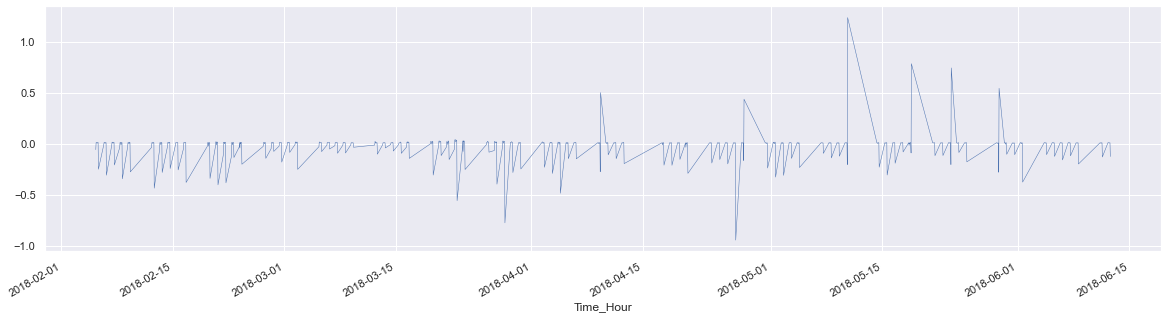

In [47]:
#Visualizing the hourly bid ask spread for level 1
sns.set(rc={'figure.figsize':(20,5)})
dfy['Avg_Bid_Ask_Spread'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Time_Hour'>

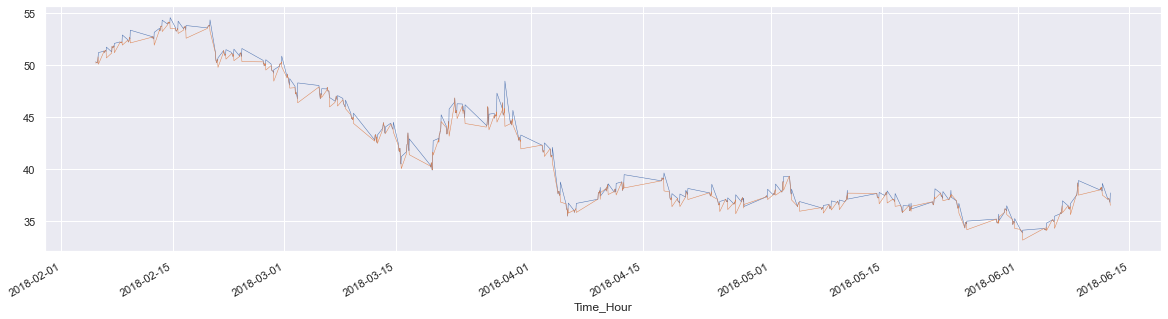

In [48]:
#Visualizing the average hourly bid and ask prices for Level 1 ABC security corresponding to the Avg_Bid_Ask_Spread
#that is the highest bid price and lowest ask price
sns.set(rc={'figure.figsize':(20,5)})
dfy['NEW_L1_BidPrice_mean'].plot(linewidth=0.5) #Blue
dfy['NEW_L1_AskPrice_mean'].plot(linewidth=0.5) #orange

<AxesSubplot:xlabel='Time_Hour'>

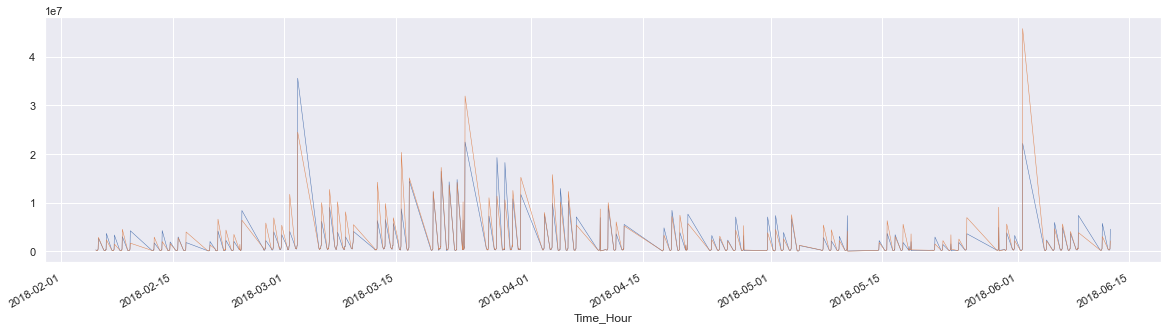

In [49]:
#Visualizing the average hourly bid and ask sizes for Level 1 corresponding to the Avg_Bid_Ask_Spread
sns.set(rc={'figure.figsize':(20,5)})
dfy['NEW_L1_BidSize_mean'].plot(linewidth=0.5) #Blue
dfy['NEW_L1_AskSize_mean'].plot(linewidth=0.5) #orange

<AxesSubplot:xlabel='Time_Hour'>

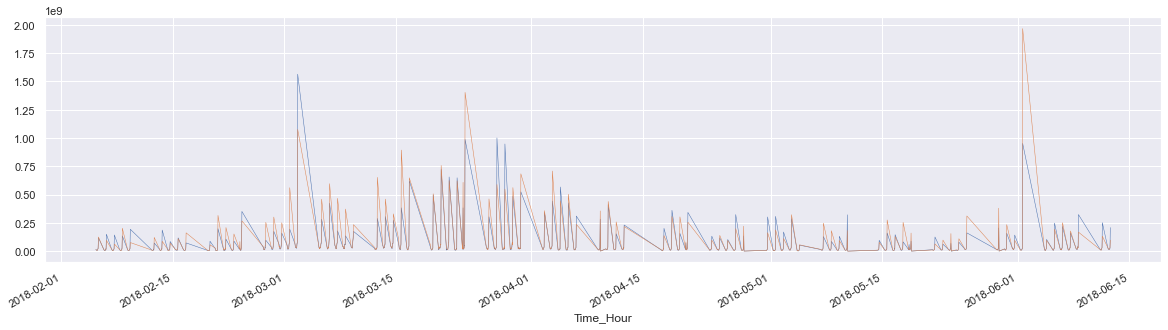

In [50]:
#Visualizing the total hourly bid and ask size for Level 1 corresponding to the Avg_Bid_Ask_Spread
sns.set(rc={'figure.figsize':(20,5)})
dfy['NEW_L1_BidSize_sum'].plot(linewidth=0.5) #Blue
dfy['NEW_L1_AskSize_sum'].plot(linewidth=0.5) #orange

<AxesSubplot:xlabel='Time_Hour'>

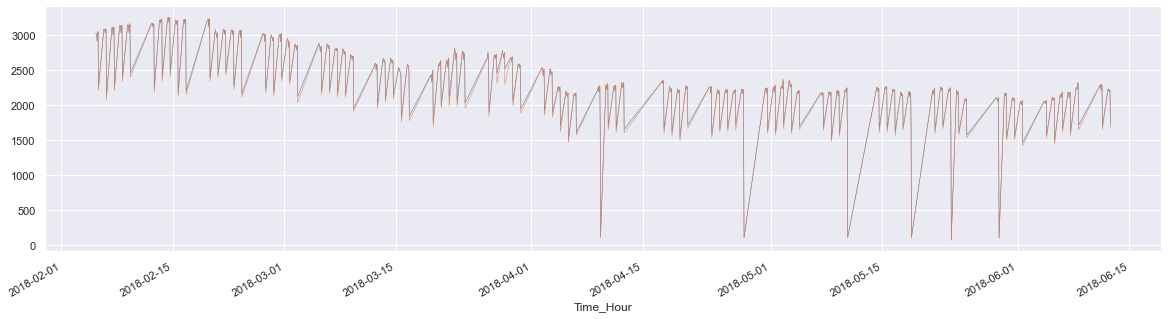

In [51]:
#Visualizing the total hourly bid and ask price for Level 1 corresponding to the Avg_Bid_Ask_Spread
sns.set(rc={'figure.figsize':(20,5)})
dfy['NEW_L1_BidPrice_sum'].plot(linewidth=0.5) #Blue
dfy['NEW_L1_AskPrice_sum'].plot(linewidth=0.5) #orange

In [52]:
#Separating the dataset to independent (X) and target (y) variables 
X = dfz.drop(['Time_Hour','Avg_Bid_Ask_Spread'],1)
y = dfz['Avg_Bid_Ask_Spread']

print(dfz.shape)
print(X.shape)
print(y.shape)

(750, 226)
(750, 224)
(750,)


In [53]:
X.head()

,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice_std,NEW_L

### Feature Selection

In [54]:
X1 = dfz.drop(['Avg_Bid_Ask_Spread'],1)
y = dfz['Avg_Bid_Ask_Spread']

#X1 = X.iloc[:,:].values
y1 = y.iloc[:,].values


print(X.shape)
print(X1.shape)
print(y.shape)
print(y1.shape)

(750, 224)
(750, 225)
(750,)
(750,)


In [55]:
X1.head()

,Time_Hour,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice

In [56]:
%%time
#Splitting the dataset for train, test and eval. We would use 85% to train 
Xa_train , Xa_test , y_train , y_test = train_test_split(X1 , y1 , 
                                            test_size = 0.15 ,
                                            random_state = 7)

Wall time: 2 ms


In [57]:
Xa_train.head()

,Time_Hour,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice

In [58]:
print('train data shape {} , test data shape {}'.format(Xa_train.shape,
                                                        Xa_test.shape))

train data shape (637, 225) , test data shape (113, 225)


#### customised my feature selection process using mrmr to access the performace of the feature selection

In this process, the test sample data remains unseen by the process of feature selection and model going forward

In [59]:
#maximum relevance minimum redundancy and using random forest for feature selection with a step of 20
n_features = range(20, 221, 20)
rf_mae = []
Xaa = Xa_train.iloc[:,1:]
for n in n_features:
    mr_r = mrmr_regression(Xaa, y_train, n, relevance ='rf')
    #Apply the list of relevant columns to test
    X_new = Xaa[mr_r]
    print(n, X_new.columns)
    Xd = X_new.iloc[:,:].values
    Xd_train , Xd_test , yd_train , yd_test = train_test_split(Xd , y_train , 
                                            test_size = 0.15 ,
                                            random_state = 7)
    model = RandomForestRegressor(n_estimators= 500, max_depth= 10, max_features= 10, random_state = 7)
    model.fit(Xd_train, yd_train)
    yd_pred = model.predict(Xd_test)
    mae = metrics.mean_absolute_error(yd_test, yd_pred)
    print(mae)
    rf_mae.append(mae)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  6.73it/s]


20 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum'],
      dtype='object')
0.019258360875237048


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 24.94it/s]


40 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum',
       'NEW_L8_BidSize_sum', 'NEW_L10_BidSize_count', 'NEW_L6_AskPrice_sum',
       'NEW_L3_BidSize_sum', 'NEW_L9_AskSize_sum', 'NEW_L10_AskPrice_sum',
       'day_of_week', 'NEW_L1_AskSize_sum', 'NEW_L1_BidSize_max',
       'NEW_L7_AskPrice_sum', 'NEW_L5_AskSize_sum', 'NEW_L9_BidSize_count',
       'NEW_L9_BidPrice_sum', 'NEW_L2_AskSize_sum', 'NEW_L7_BidPrice_sum',
       'NEW_L5_AskPrice_std', 'NEW_L7_AskSize_sum', 'NEW_L3_BidPrice_sum',
      

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:02<00:00, 25.60it/s]


60 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum',
       'NEW_L8_BidSize_sum', 'NEW_L10_BidSize_count', 'NEW_L6_AskPrice_sum',
       'NEW_L3_BidSize_sum', 'NEW_L9_AskSize_sum', 'NEW_L10_AskPrice_sum',
       'day_of_week', 'NEW_L1_AskSize_sum', 'NEW_L1_BidSize_max',
       'NEW_L7_AskPrice_sum', 'NEW_L5_AskSize_sum', 'NEW_L9_BidSize_count',
       'NEW_L9_BidPrice_sum', 'NEW_L2_AskSize_sum', 'NEW_L7_BidPrice_sum',
       'NEW_L5_AskPrice_std', 'NEW_L7_AskSize_sum', 'NEW_L3_BidPrice_sum',
      

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 26.24it/s]


80 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum',
       'NEW_L8_BidSize_sum', 'NEW_L10_BidSize_count', 'NEW_L6_AskPrice_sum',
       'NEW_L3_BidSize_sum', 'NEW_L9_AskSize_sum', 'NEW_L10_AskPrice_sum',
       'day_of_week', 'NEW_L1_AskSize_sum', 'NEW_L1_BidSize_max',
       'NEW_L7_AskPrice_sum', 'NEW_L5_AskSize_sum', 'NEW_L9_BidSize_count',
       'NEW_L9_BidPrice_sum', 'NEW_L2_AskSize_sum', 'NEW_L7_BidPrice_sum',
       'NEW_L5_AskPrice_std', 'NEW_L7_AskSize_sum', 'NEW_L3_BidPrice_sum',
      

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.96it/s]


100 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum',
       'NEW_L8_BidSize_sum', 'NEW_L10_BidSize_count', 'NEW_L6_AskPrice_sum',
       'NEW_L3_BidSize_sum', 'NEW_L9_AskSize_sum', 'NEW_L10_AskPrice_sum',
       'day_of_week', 'NEW_L1_AskSize_sum', 'NEW_L1_BidSize_max',
       'NEW_L7_AskPrice_sum', 'NEW_L5_AskSize_sum', 'NEW_L9_BidSize_count',
       'NEW_L9_BidPrice_sum', 'NEW_L2_AskSize_sum', 'NEW_L7_BidPrice_sum',
       'NEW_L5_AskPrice_std', 'NEW_L7_AskSize_sum', 'NEW_L3_BidPrice_sum',
     

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:04<00:00, 27.85it/s]


120 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'NEW_L8_AskPrice_max', 'NEW_L7_BidSize_std', 'NEW_L3_AskPrice_std',
       'NEW_L6_AskSize_mean', 'NEW_L3_BidPrice_max', 'NEW_L9_AskPrice_std',
       'NEW_L4_BidSize_max', 'NEW_L4_AskSize_min', 'NEW_L7_BidSize_mean',
       'NEW_L3_AskSize_mean'],
      dtype='object', length=120)
0.018412743477553117


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:05<00:00, 27.41it/s]


140 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'NEW_L4_BidSize_mean', 'NEW_L10_BidPrice_mean', 'High',
       'NEW_L4_BidSize_std', 'NEW_L4_BidPrice_max', 'NEW_L8_AskSize_max',
       'NEW_L5_AskSize_max', 'NEW_L3_AskPrice_mean', 'NEW_L9_BidSize_min',
       'NEW_L10_BidPrice_std'],
      dtype='object', length=140)
0.018852967005146107


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:05<00:00, 29.64it/s]


160 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'Volume', 'NEW_L8_BidPrice_min', 'NEW_L8_BidSize_min',
       'NEW_L4_AskPrice_std', 'NEW_L9_BidPrice_mean', 'NEW_L2_BidPrice_max',
       'NEW_L7_AskSize_std', 'NEW_L2_AskPrice_mean', 'NEW_L6_BidPrice_max',
       'NEW_L4_BidPrice_mean'],
      dtype='object', length=160)
0.0185871578898091


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:05<00:00, 31.34it/s]


180 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'NEW_L3_AskSize_std', 'NEW_L4_AskPrice_sum', 'NEW_L5_BidPrice_sum',
       'NEW_L3_BidSize_std', 'NEW_L7_AskPrice_min', 'NEW_L2_AskPrice_min',
       'NEW_L7_AskSize_min', 'TWAP', 'NEW_L10_AskPrice_max',
       'NEW_L3_BidSize_max'],
      dtype='object', length=180)
0.018477061440950848


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.07it/s]


200 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'NEW_L7_BidPrice_min', 'VWAP', 'NEW_L7_AskSize_mean',
       'NEW_L5_BidPrice_min', 'NEW_L7_AskPrice_max', 'NEW_L10_AskSize_max',
       'NEW_L4_AskPrice_max', 'NEW_L9_BidSize_mean', 'NEW_L3_BidPrice_min',
       'NEW_L7_AskPrice_mean'],
      dtype='object', length=200)
0.019039814923671915


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:11<00:00, 19.42it/s]


220 Index(['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum',
       ...
       'NEW_L2_BidPrice_min', 'NEW_L2_BidPrice_sum', 'NEW_L10_BidPrice_min',
       'NEW_L4_AskSize_mean', 'NEW_L8_AskPrice_min', 'NEW_L6_AskPrice_min',
       'month', 'NEW_L9_AskPrice_max', 'NEW_L10_AskPrice_mean',
       'NEW_L5_AskPrice_min'],
      dtype='object', length=216)
0.01878237061073347


In [60]:
#Saved result of Feature selection showing the mean_absolute_error for every set of 20 features selected
rf_mae

[0.019258360875237048,
 0.018590197991595104,
 0.0186800199725462,
 0.017954775453222868,
 0.018166263012235923,
 0.018412743477553117,
 0.018852967005146107,
 0.0185871578898091,
 0.018477061440950848,
 0.019039814923671915,
 0.01878237061073347]

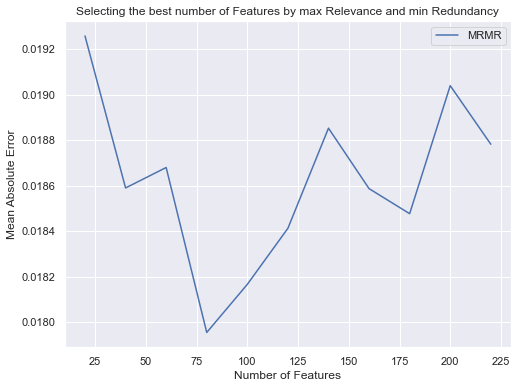

In [61]:
#Visualise the results of the feature selection process
plt.figure(figsize=(8,6))
plt.plot(n_features, rf_mae, label='MRMR')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Error')
plt.title('Selecting the best number of Features by max Relevance and min Redundancy')
plt.legend(loc='upper right')
plt.show()

#### Note 9
In steps of 20 interval, the optimal number of features to give max relevance and min reduncdancy is 80 features (reduced from 224). 

In [62]:
dfz.head()

,Time_Hour,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,Avg_Bid_Ask_Spread,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_

### Modelling

In [63]:
Xa_train.head()

,Time_Hour,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,month,day,hour,day_of_week,NEW_Normalised_Order_Book_Imbalance_sum,NEW_Normalised_Order_Book_Imbalance_min,NEW_Normalised_Order_Book_Imbalance_mean,NEW_Normalised_Order_Book_Imbalance_max,NEW_L10_BidSize_count,NEW_L9_BidSize_count,NEW_L8_BidSize_count,NEW_L7_BidSize_count,NEW_L6_BidSize_count,NEW_L1_BidSize_count,NEW_L10_BidPrice_min,NEW_L10_BidPrice_mean,NEW_L10_BidPrice_max,NEW_L10_BidPrice_sum,NEW_L9_BidPrice_min,NEW_L9_BidPrice_mean,NEW_L9_BidPrice_max,NEW_L9_BidPrice_sum,NEW_L8_BidPrice_min,NEW_L8_BidPrice_mean,NEW_L8_BidPrice_max,NEW_L8_BidPrice_sum,NEW_L7_BidPrice_min,NEW_L7_BidPrice_mean,NEW_L7_BidPrice_max,NEW_L7_BidPrice_sum,NEW_L6_BidPrice_min,NEW_L6_BidPrice_mean,NEW_L6_BidPrice_max,NEW_L6_BidPrice_sum,NEW_L5_BidPrice_min,NEW_L5_BidPrice_mean,NEW_L5_BidPrice_max,NEW_L5_BidPrice_sum,NEW_L4_BidPrice_min,NEW_L4_BidPrice_mean,NEW_L4_BidPrice_max,NEW_L4_BidPrice_sum,NEW_L3_BidPrice_min,NEW_L3_BidPrice_mean,NEW_L3_BidPrice_max,NEW_L3_BidPrice_sum,NEW_L2_BidPrice_min,NEW_L2_BidPrice_mean,NEW_L2_BidPrice_max,NEW_L2_BidPrice_sum,NEW_L1_BidPrice_min,NEW_L1_BidPrice_mean,NEW_L1_BidPrice_max,NEW_L1_BidPrice_sum,NEW_L1_AskPrice_min,NEW_L1_AskPrice_mean,NEW_L1_AskPrice_max,NEW_L1_AskPrice_sum,NEW_L2_AskPrice_min,NEW_L2_AskPrice_mean,NEW_L2_AskPrice_max,NEW_L2_AskPrice_sum,NEW_L3_AskPrice_min,NEW_L3_AskPrice_mean,NEW_L3_AskPrice_max,NEW_L3_AskPrice_sum,NEW_L4_AskPrice_min,NEW_L4_AskPrice_mean,NEW_L4_AskPrice_max,NEW_L4_AskPrice_sum,NEW_L5_AskPrice_min,NEW_L5_AskPrice_mean,NEW_L5_AskPrice_max,NEW_L5_AskPrice_sum,NEW_L6_AskPrice_min,NEW_L6_AskPrice_mean,NEW_L6_AskPrice_max,NEW_L6_AskPrice_sum,NEW_L7_AskPrice_min,NEW_L7_AskPrice_mean,NEW_L7_AskPrice_max,NEW_L7_AskPrice_sum,NEW_L8_AskPrice_min,NEW_L8_AskPrice_mean,NEW_L8_AskPrice_max,NEW_L8_AskPrice_sum,NEW_L9_AskPrice_min,NEW_L9_AskPrice_mean,NEW_L9_AskPrice_max,NEW_L9_AskPrice_sum,NEW_L10_AskPrice_min,NEW_L10_AskPrice_mean,NEW_L10_AskPrice_max,NEW_L10_AskPrice_sum,NEW_L10_AskSize_min,NEW_L10_AskSize_mean,NEW_L10_AskSize_max,NEW_L10_AskSize_sum,NEW_L10_BidSize_min,NEW_L10_BidSize_mean,NEW_L10_BidSize_max,NEW_L10_BidSize_sum,NEW_L9_BidSize_min,NEW_L9_BidSize_mean,NEW_L9_BidSize_max,NEW_L9_BidSize_sum,NEW_L8_BidSize_min,NEW_L8_BidSize_mean,NEW_L8_BidSize_max,NEW_L8_BidSize_sum,NEW_L7_BidSize_min,NEW_L7_BidSize_mean,NEW_L7_BidSize_max,NEW_L7_BidSize_sum,NEW_L6_BidSize_min,NEW_L6_BidSize_mean,NEW_L6_BidSize_max,NEW_L6_BidSize_sum,NEW_L1_AskSize_min,NEW_L1_AskSize_mean,NEW_L1_AskSize_max,NEW_L1_AskSize_sum,NEW_L3_BidSize_min,NEW_L3_BidSize_mean,NEW_L3_BidSize_max,NEW_L3_BidSize_sum,NEW_L2_BidSize_min,NEW_L2_BidSize_mean,NEW_L2_BidSize_max,NEW_L2_BidSize_sum,NEW_L1_BidSize_min,NEW_L1_BidSize_mean,NEW_L1_BidSize_max,NEW_L1_BidSize_sum,NEW_L4_BidSize_min,NEW_L4_BidSize_mean,NEW_L4_BidSize_max,NEW_L4_BidSize_sum,NEW_L7_AskSize_min,NEW_L7_AskSize_mean,NEW_L7_AskSize_max,NEW_L7_AskSize_sum,NEW_L5_AskSize_min,NEW_L5_AskSize_mean,NEW_L5_AskSize_max,NEW_L5_AskSize_sum,NEW_L6_AskSize_min,NEW_L6_AskSize_mean,NEW_L6_AskSize_max,NEW_L6_AskSize_sum,NEW_L8_AskSize_min,NEW_L8_AskSize_mean,NEW_L8_AskSize_max,NEW_L8_AskSize_sum,NEW_L3_AskSize_min,NEW_L3_AskSize_mean,NEW_L3_AskSize_max,NEW_L3_AskSize_sum,NEW_L5_BidSize_min,NEW_L5_BidSize_mean,NEW_L5_BidSize_max,NEW_L5_BidSize_sum,NEW_L4_AskSize_min,NEW_L4_AskSize_mean,NEW_L4_AskSize_max,NEW_L4_AskSize_sum,NEW_L9_AskSize_min,NEW_L9_AskSize_mean,NEW_L9_AskSize_max,NEW_L9_AskSize_sum,NEW_L2_AskSize_min,NEW_L2_AskSize_mean,NEW_L2_AskSize_max,NEW_L2_AskSize_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L9_AskPrice_std,NEW_L8_AskPrice_std,NEW_L7_AskPrice_std,NEW_L8_BidPrice_std,NEW_L1_BidPrice_std,NEW_L10_AskPrice_std,NEW_L7_BidPrice_std,NEW_L9_BidPrice_std,NEW_L10_BidPrice_std,NEW_L6_AskPrice_std,NEW_L6_BidPrice_std,NEW_L5_AskPrice_std,NEW_L4_AskPrice_std,NEW_L3_AskPrice_std,NEW_L5_BidPrice_std,NEW_L4_BidPrice_std,NEW_L2_AskPrice_std,NEW_L3_BidPrice_std,NEW_L2_BidPrice_std,NEW_L1_AskPrice

In [64]:
#List of the 80 selected features
feat_sel = ['NEW_L1_BidPrice_std', 'NumberOfTrades', 'NEW_L1_AskPrice_std',
       'NEW_L1_BidSize_std', 'NEW_L4_BidSize_sum', 'NEW_L7_BidSize_count',
       'NEW_L1_AskSize_std', 'NEW_L7_BidSize_sum', 'NEW_L2_BidPrice_std',
       'NEW_L8_BidPrice_sum', 'NEW_L6_BidSize_count', 'NEW_L10_AskSize_sum',
       'NEW_L1_BidSize_sum', 'NEW_L1_BidSize_count',
       'NEW_Normalised_Order_Book_Imbalance_sum', 'NEW_L2_AskPrice_std',
       'NEW_L4_AskSize_sum', 'NEW_L1_AskPrice_sum',
       'NEW_Normalised_Order_Book_Imbalance_std', 'NEW_L8_AskSize_sum',
       'NEW_L8_BidSize_sum', 'NEW_L10_BidSize_count', 'NEW_L6_AskPrice_sum',
       'NEW_L3_BidSize_sum', 'NEW_L9_AskSize_sum', 'NEW_L10_AskPrice_sum',
       'day_of_week', 'NEW_L1_AskSize_sum', 'NEW_L1_BidSize_max',
       'NEW_L7_AskPrice_sum', 'NEW_L5_AskSize_sum', 'NEW_L9_BidSize_count',
       'NEW_L9_BidPrice_sum', 'NEW_L2_AskSize_sum', 'NEW_L7_BidPrice_sum',
       'NEW_L5_AskPrice_std', 'NEW_L7_AskSize_sum', 'NEW_L3_BidPrice_sum',
       'NEW_L1_AskSize_max', 'NEW_L8_AskSize_mean', 'NEW_L5_AskPrice_sum',
       'NEW_L3_BidPrice_std', 'NEW_L6_BidSize_sum', 'NEW_L1_BidPrice_sum',
       'NEW_L5_BidSize_sum', 'NEW_L6_AskSize_sum', 'NEW_L2_BidSize_min',
       'NEW_L6_BidPrice_sum', 'NEW_L7_AskPrice_std', 'NEW_L3_AskPrice_sum',
       'NEW_L8_BidSize_count', 'NEW_L6_AskSize_max', 'NEW_L8_AskPrice_sum',
       'NEW_L2_BidSize_sum', 'hour', 'NEW_L9_BidPrice_std',
       'NEW_Normalised_Order_Book_Imbalance_mean', 'NEW_L7_BidPrice_std',
       'NEW_L6_AskSize_std', 'day', 'NEW_L8_BidPrice_std',
       'NEW_L10_BidSize_sum', 'NEW_L1_AskPrice_min',
       'NEW_Normalised_Order_Book_Imbalance_max', 'NEW_L4_BidPrice_sum',
       'NEW_L3_AskSize_sum', 'NEW_L3_BidSize_mean',
       'NEW_Normalised_Order_Book_Imbalance_min', 'NEW_L9_AskPrice_sum',
       'NEW_L8_AskSize_min', 'NEW_L10_BidPrice_sum', 'NEW_L4_AskSize_std',
       'NEW_L1_AskSize_min', 'NEW_L2_AskSize_mean', 'NEW_L6_BidSize_max',
       'NEW_L9_AskSize_std', 'NEW_L2_AskSize_std', 'NEW_L6_AskPrice_std',
       'NEW_L9_BidSize_max', 'NEW_L9_AskSize_mean']
print(len(feat_sel))

80


In [65]:
#SSplice training dataset to the 80 selected features
Xf_train = Xa_train[feat_sel]
Xf_test = Xa_test[feat_sel]

In [66]:
Xf_train.head()

,NEW_L1_BidPrice_std,NumberOfTrades,NEW_L1_AskPrice_std,NEW_L1_BidSize_std,NEW_L4_BidSize_sum,NEW_L7_BidSize_count,NEW_L1_AskSize_std,NEW_L7_BidSize_sum,NEW_L2_BidPrice_std,NEW_L8_BidPrice_sum,NEW_L6_BidSize_count,NEW_L10_AskSize_sum,NEW_L1_BidSize_sum,NEW_L1_BidSize_count,NEW_Normalised_Order_Book_Imbalance_sum,NEW_L2_AskPrice_std,NEW_L4_AskSize_sum,NEW_L1_AskPrice_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L8_AskSize_sum,NEW_L8_BidSize_sum,NEW_L10_BidSize_count,NEW_L6_AskPrice_sum,NEW_L3_BidSize_sum,NEW_L9_AskSize_sum,NEW_L10_AskPrice_sum,day_of_week,NEW_L1_AskSize_sum,NEW_L1_BidSize_max,NEW_L7_AskPrice_sum,NEW_L5_AskSize_sum,NEW_L9_BidSize_count,NEW_L9_BidPrice_sum,NEW_L2_AskSize_sum,NEW_L7_BidPrice_sum,NEW_L5_AskPrice_std,NEW_L7_AskSize_sum,NEW_L3_BidPrice_sum,NEW_L1_AskSize_max,NEW_L8_AskSize_mean,NEW_L5_AskPrice_sum,NEW_L3_BidPrice_std,NEW_L6_BidSize_sum,NEW_L1_BidPrice_sum,NEW_L5_BidSize_sum,NEW_L6_AskSize_sum,NEW_L2_BidSize_min,NEW_L6_BidPrice_sum,NEW_L7_AskPrice_std,NEW_L3_AskPrice_sum,NEW_L8_BidSize_count,NEW_L6_AskSize_max,NEW_L8_AskPrice_sum,NEW_L2_BidSize_sum,hour,NEW_L9_BidPrice_std,NEW_Normalised_Order_Book_Imbalance_mean,NEW_L7_BidPrice_std,NEW_L6_AskSize_std,day,NEW_L8_BidPrice_std,NEW_L10_BidSize_sum,NEW_L1_AskPrice_min,NEW_Normalised_Order_Book_Imbalance_max,NEW_L4_BidPrice_sum,NEW_L3_AskSize_sum,NEW_L3_BidSize_mean,NEW_Normalised_Order_Book_Imbalance_min,NEW_L9_AskPrice_sum,NEW_L8_AskSize_min,NEW_L10_BidPrice_sum,NEW_L4_AskSize_std,NEW_L1_AskSize_min,NEW_L2_AskSize_mean,NEW_L6_BidSize_max,NEW_L9_AskSize_std,NEW_L2_AskSize_std,NEW_L6_AskPrice_std,NEW_L9_BidSize_max,NEW_L9_AskSize_mean
Time_Hour_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31316,0.709639,7775,1.016671,1.708110e+07,1.062357e+08,47,2.757134e+07,1.129112e+08,0.684941,2059.703162,47,1.310286e+08,3.065594e+08,47,5.746139,0.907687,8.711746e+07,2039.392810,0.302724,1.082240e+08,1.032333e+08,47,2047.822881,8.772617e+07,1.133681e+08,2051.700487,1,4.604541e+08,7.358651e+07,2047.991164,9.916279e+07,47,2057.830416,6.536161e+07,2060.367158,0.722601,1.497371e+08,2065.796483,1.236794e+08,2.302639e+06,2046.550157,0.602871,1.066515e+08,2068.783569,1.034605e+08,1.218472e+08,72.727273,2060.683272,0.716068,2042.885246,47,1.734894e+07,2050.414262,1.080782e+08,16,0.372644,0.122258,0.436690,2.851069e+06,13,0.420180,1.439006e+08,40.690909,0.708437,2063.040483,1.201863e+08,1.866514e+06,-0.269653,2051.350631,1451.363636,2057.706154,1.518684e+06,72.727273,1.390672e+06,1.003424e+07,1.890650e+06,1.265735e+06,0.718635,6.618395e+06,2.412087e+06
5311,0.125834,3865,0.125245,7.747885e+04,1.998784e+07,59,7.986849e+04,2.054688e+07,0.125567,2257.225631,59,1.413238e+07,8.517878e+06,59,4.512873,0.125041,1.632976e+07,2259.804704,0.150093,1.529685e+07,1.964665e+07,59,2261.168373,1.651502e+07,1.534157e+07,2262.308871,3,9.193005e+06,4.218348e+05,2261.424178,1.676406e+07,59,2256.985856,1.392143e+07,2257.451629,0.125715,1.640824e+07,2258.573526,3.970489e+05,2.592686e+05,2260.858229,0.125579,2.164740e+07,2259.112286,2.113193e+07,1.622650e+07,1593.272727,2257.742560,0.125894,2260.303318,59,6.908542e+05,2261.688482,1.186082e+07,11,0.124890,0.076489,0.124320,1.378502e+05,3,0.123999,1.691925e+07,38.033135,0.379486,2258.262208,1.740581e+07,2.799157e+05,-0.215247,2261.966781,1721.454545,2256.707155,1.320955e+05,1038.090909,2.359564e+05,1.118213e+06,1.341329e+05,1.060273e+05,0.126194,5.570707e+05,2.600267e+05
2149,0.024915,1424,0.024792,5.384122e+04,1.856141e+07,60,4.398245e+04,2.252002e+07,0.024616,3238.008760,60,1.806682e+07,8.758203e+06,60,-2.569791,0.024517,2.420228e+07,3242.638921,0.060539,2.245790e+07,2.418992e+07,60,3245.295104,1.714956e+07,1.983562e+07,3247.425348,2,7.158581e+06,2.728432e+05,3245.813915,2.499402e+07,60,3237.504821,1.522003e+07,3238.510797,0.024629,2.829455e+07,3240.757654,2.500620e+05,3.742984e+05,3244.723370,0.024599,2.119150e+07,3241.764782,2.208735e+07,2.608536e+07,76887.545450,3239.119573,0.023711,3243.667475,60,8.493875e+0

In [67]:
X_train = Xf_train.iloc[:,:].values
X_test = Xf_test.iloc[:,:].values

In [68]:
print('train data shape {} , test data shape {}'.format(X_train.shape,
                                                        X_test.shape))

train data shape (637, 80) , test data shape (113, 80)


#### Algorithm used is Random Forest
Due to  
1. high dimentionality of the data
2. The presence of multicolinearity


In [69]:
#Usinf RF
mod1 = RandomForestRegressor(n_estimators= 500, max_depth= 10, max_features= 10, random_state = 7)
mod1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=500,
                      random_state=7)

#### Testing the model on a new sample (in time)

In [70]:
#Prediction
y_pred = mod1.predict(X_test)

In [71]:
#Funtion to calculate performance/evaluation metrics
mc.eval_metric(y_test, y_pred)

The coefficient of determination score for the predicted cost of transaction is 0.8289700191164708
The explained varience score for the predicted cost of transaction is 0.8380073718787198
The mean square error for the predicted cost of transaction is 0.0010686763139856035
The mean absolute error for the predicted cost of transaction is 0.014306298308028048


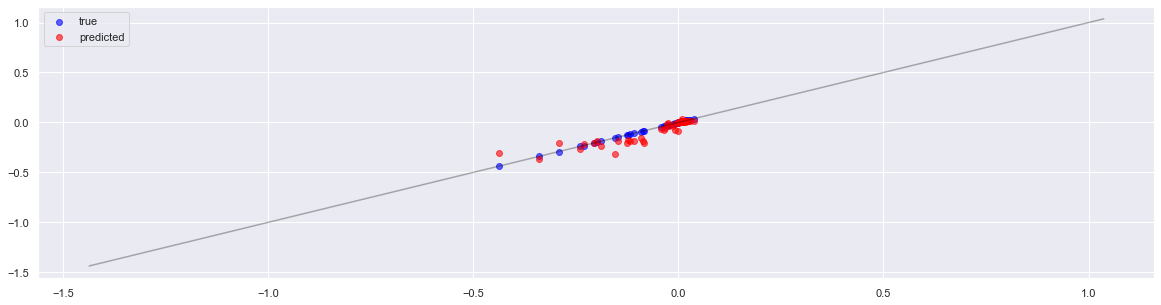

In [72]:
#Goodness of Fit (Line of best fit)
#Visualizing y_test and y_pred
mc.line_of_best_fit(y_test, y_pred)

#### Note 10
For a regression model, the predicted values are relatively close to the true line showing the model can be relied on. The reliability of the model is shown when the performance is considered. A mean absolute error of 1.4% shows a relatively small variation/error margin between the true and predicted values and a high coefficient of determination of 82.9%

In [73]:
Xf_test.head()

,NEW_L1_BidPrice_std,NumberOfTrades,NEW_L1_AskPrice_std,NEW_L1_BidSize_std,NEW_L4_BidSize_sum,NEW_L7_BidSize_count,NEW_L1_AskSize_std,NEW_L7_BidSize_sum,NEW_L2_BidPrice_std,NEW_L8_BidPrice_sum,NEW_L6_BidSize_count,NEW_L10_AskSize_sum,NEW_L1_BidSize_sum,NEW_L1_BidSize_count,NEW_Normalised_Order_Book_Imbalance_sum,NEW_L2_AskPrice_std,NEW_L4_AskSize_sum,NEW_L1_AskPrice_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L8_AskSize_sum,NEW_L8_BidSize_sum,NEW_L10_BidSize_count,NEW_L6_AskPrice_sum,NEW_L3_BidSize_sum,NEW_L9_AskSize_sum,NEW_L10_AskPrice_sum,day_of_week,NEW_L1_AskSize_sum,NEW_L1_BidSize_max,NEW_L7_AskPrice_sum,NEW_L5_AskSize_sum,NEW_L9_BidSize_count,NEW_L9_BidPrice_sum,NEW_L2_AskSize_sum,NEW_L7_BidPrice_sum,NEW_L5_AskPrice_std,NEW_L7_AskSize_sum,NEW_L3_BidPrice_sum,NEW_L1_AskSize_max,NEW_L8_AskSize_mean,NEW_L5_AskPrice_sum,NEW_L3_BidPrice_std,NEW_L6_BidSize_sum,NEW_L1_BidPrice_sum,NEW_L5_BidSize_sum,NEW_L6_AskSize_sum,NEW_L2_BidSize_min,NEW_L6_BidPrice_sum,NEW_L7_AskPrice_std,NEW_L3_AskPrice_sum,NEW_L8_BidSize_count,NEW_L6_AskSize_max,NEW_L8_AskPrice_sum,NEW_L2_BidSize_sum,hour,NEW_L9_BidPrice_std,NEW_Normalised_Order_Book_Imbalance_mean,NEW_L7_BidPrice_std,NEW_L6_AskSize_std,day,NEW_L8_BidPrice_std,NEW_L10_BidSize_sum,NEW_L1_AskPrice_min,NEW_Normalised_Order_Book_Imbalance_max,NEW_L4_BidPrice_sum,NEW_L3_AskSize_sum,NEW_L3_BidSize_mean,NEW_Normalised_Order_Book_Imbalance_min,NEW_L9_AskPrice_sum,NEW_L8_AskSize_min,NEW_L10_BidPrice_sum,NEW_L4_AskSize_std,NEW_L1_AskSize_min,NEW_L2_AskSize_mean,NEW_L6_BidSize_max,NEW_L9_AskSize_std,NEW_L2_AskSize_std,NEW_L6_AskPrice_std,NEW_L9_BidSize_max,NEW_L9_AskSize_mean
Time_Hour_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51815,1.146801,2008,0.943156,5.375787e+06,4.669202e+07,45,9.797069e+06,4.192259e+07,0.983651,1636.770340,45,3.659613e+07,8.868944e+07,45,-4.166618,0.748934,5.661739e+07,1615.789483,0.289086,3.870322e+07,3.837986e+07,45,1625.774710,3.090488e+07,3.706691e+07,1627.877559,4,1.602457e+08,2.774707e+07,1626.385516,5.092574e+07,45,1635.737370,5.759928e+07,1638.255631,0.514894,4.175484e+07,1640.678791,5.081682e+07,8.600714e+05,1624.520203,0.565886,3.503638e+07,1651.467180,3.165615e+07,4.397349e+07,436.000000,1638.230144,0.451283,1622.064599,45,2276893.364,1626.799389,2.714263e+07,15,0.380224,-0.092592,0.473872,717202.505007,18,0.419922,3.165378e+07,33.363636,0.510414,1640.876111,1.139980e+08,6.867750e+05,-0.524854,1627.346174,2.000000,1634.948710,1.110162e+06,26.545455,1.279984e+06,6136429.818,623448.848390,1.245785e+06,0.460929,3960921.636,8.237091e+05
21216,1.427500,719,1.684196,4.919814e+06,2.208612e+07,42,8.332924e+06,3.056511e+07,0.829262,2212.860993,42,1.724286e+07,7.210806e+07,42,3.220547,1.191814,1.924895e+07,2179.405294,0.112655,1.677586e+07,3.184340e+07,42,2197.862075,2.671071e+07,1.274174e+07,2203.100299,0,1.214260e+08,2.754799e+07,2198.772248,1.451052e+07,42,2211.351502,1.573293e+07,2212.619216,0.775912,1.841964e+07,2219.754169,4.584149e+07,3.994252e+05,2197.126473,0.802051,3.149006e+07,2231.323371,2.782586e+07,1.908895e+07,2845.181818,2213.146457,0.723803,2196.074205,42,3915299.000,2200.407469,2.240769e+07,16,0.447197,0.076680,0.492004,622332.674751,12,0.512608,2.216524e+07,47.590909,0.290090,2216.945186,1.906284e+07,6.359693e+05,-0.175287,2202.755232,327.272727,2209.643652,3.426412e+05,9347.818182,3.745937e+05,6095232.182,325934.819030,3.506902e+05,0.758517,4290459.727,3.033749e+05
3219,0.190642,5431,0.190989,1.899078e+05,4.778838e+07,60,1.844432e+05,5.301827e+07,0.190763,2598.472937,60,3.949207e+07,1.891128e+07,60,-0.418709,0.191286,5.153693e+07,2601.599420,0.068470,4.732597e+07,5.006335e+07,60,2602.898078,3.971538e+07,4.229511e+07,2604.138015,2,1.989320e+07,8.904016e+05,2603.148791,5.478897e+07,60,2598.169140,3.041551e+07,2598.734631,0.191276,5.243263e+07,2599.820442,8.059471e+05,7.887662e+05,2602.604780,0.190866,5.383056e+07,2600.346222,5.281161e+07,5.422274e+07,76982.181820,2599.012927,0.191444,2602.161450,60,2073647.273,2

In [74]:
#Visualize the actual and predicted Avg_Bid_Ask_Spread
t = Xa_test['Time_Hour']
Xt_test = Xf_test.copy()

Xt_test['Time_Hour'] = t
Xt_test['Avg_Bid_Ask_Spread'] = y_test
Xt_test['pred_Avg_Bid_Ask_Spread'] = y_pred

Xt_test = Xt_test.reset_index()
Xt_test = Xt_test.set_index('Time_Hour')
Xt_test.head()

,Time_Hour_ID,NEW_L1_BidPrice_std,NumberOfTrades,NEW_L1_AskPrice_std,NEW_L1_BidSize_std,NEW_L4_BidSize_sum,NEW_L7_BidSize_count,NEW_L1_AskSize_std,NEW_L7_BidSize_sum,NEW_L2_BidPrice_std,NEW_L8_BidPrice_sum,NEW_L6_BidSize_count,NEW_L10_AskSize_sum,NEW_L1_BidSize_sum,NEW_L1_BidSize_count,NEW_Normalised_Order_Book_Imbalance_sum,NEW_L2_AskPrice_std,NEW_L4_AskSize_sum,NEW_L1_AskPrice_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L8_AskSize_sum,NEW_L8_BidSize_sum,NEW_L10_BidSize_count,NEW_L6_AskPrice_sum,NEW_L3_BidSize_sum,NEW_L9_AskSize_sum,NEW_L10_AskPrice_sum,day_of_week,NEW_L1_AskSize_sum,NEW_L1_BidSize_max,NEW_L7_AskPrice_sum,NEW_L5_AskSize_sum,NEW_L9_BidSize_count,NEW_L9_BidPrice_sum,NEW_L2_AskSize_sum,NEW_L7_BidPrice_sum,NEW_L5_AskPrice_std,NEW_L7_AskSize_sum,NEW_L3_BidPrice_sum,NEW_L1_AskSize_max,NEW_L8_AskSize_mean,NEW_L5_AskPrice_sum,NEW_L3_BidPrice_std,NEW_L6_BidSize_sum,NEW_L1_BidPrice_sum,NEW_L5_BidSize_sum,NEW_L6_AskSize_sum,NEW_L2_BidSize_min,NEW_L6_BidPrice_sum,NEW_L7_AskPrice_std,NEW_L3_AskPrice_sum,NEW_L8_BidSize_count,NEW_L6_AskSize_max,NEW_L8_AskPrice_sum,NEW_L2_BidSize_sum,hour,NEW_L9_BidPrice_std,NEW_Normalised_Order_Book_Imbalance_mean,NEW_L7_BidPrice_std,NEW_L6_AskSize_std,day,NEW_L8_BidPrice_std,NEW_L10_BidSize_sum,NEW_L1_AskPrice_min,NEW_Normalised_Order_Book_Imbalance_max,NEW_L4_BidPrice_sum,NEW_L3_AskSize_sum,NEW_L3_BidSize_mean,NEW_Normalised_Order_Book_Imbalance_min,NEW_L9_AskPrice_sum,NEW_L8_AskSize_min,NEW_L10_BidPrice_sum,NEW_L4_AskSize_std,NEW_L1_AskSize_min,NEW_L2_AskSize_mean,NEW_L6_BidSize_max,NEW_L9_AskSize_std,NEW_L2_AskSize_std,NEW_L6_AskPrice_std,NEW_L9_BidSize_max,NEW_L9_AskSize_mean,Avg_Bid_Ask_Spread,pred_Avg_Bid_Ask_Spread
Time_Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-18 15:00:00+00:00,51815,1.146801,2008,0.943156,5.375787e+06,4.669202e+07,45,9.797069e+06,4.192259e+07,0.983651,1636.770340,45,3.659613e+07,8.868944e+07,45,-4.166618,0.748934,5.661739e+07,1615.789483,0.289086,3.870322e+07,3.837986e+07,45,1625.774710,3.090488e+07,3.706691e+07,1627.877559,4,1.602457e+08,2.774707e+07,1626.385516,5.092574e+07,45,1635.737370,5.759928e+07,1638.255631,0.514894,4.175484e+07,1640.678791,5.081682e+07,8.600714e+05,1624.520203,0.565886,3.503638e+07,1651.467180,3.165615e+07,4.397349e+07,436.000000,1638.230144,0.451283,1622.064599,45,2276893.364,1626.799389,2.714263e+07,15,0.380224,-0.092592,0.473872,717202.505007,18,0.419922,3.165378e+07,33.363636,0.510414,1640.876111,1.139980e+08,6.867750e+05,-0.524854,1627.346174,2.000000,1634.948710,1.110162e+06,26.545455,1.279984e+06,6136429.818,623448.848390,1.245785e+06,0.460929,3960921.636,8.237091e+05,-0.091512,-0.154684
2018-02-12 16:00:00+00:00,21216,1.427500,719,1.684196,4.919814e+06,2.208612e+07,42,8.332924e+06,3.056511e+07,0.829262,2212.860993,42,1.724286e+07,7.210806e+07,42,3.220547,1.191814,1.924895e+07,2179.405294,0.112655,1.677586e+07,3.184340e+07,42,2197.862075,2.671071e+07,1.274174e+07,2203.100299,0,1.214260e+08,2.754799e+07,2198.772248,1.451052e+07,42,2211.351502,1.573293e+07,2212.619216,0.775912,1.841964e+07,2219.754169,4.584149e+07,3.994252e+05,2197.126473,0.802051,3.149006e+07,2231.323371,2.782586e+07,1.908895e+07,2845.181818,2213.146457,0.723803,2196.074205,42,3915299.000,2200.407469,2.240769e+07,16,0.447197,0.076680,0.492004,622332.674751,12,0.512608,2.216524e+07,47.590909,0.290090,2216.945186,1.906284e+07,6.359693e+05,-0.175287,2202.755232,327.272727,2209.643652,3.426412e+05,9347.818182,3.745937e+05,6095232.182,325934.819030,3.506902e+05,0.758517,4290459.727,3.033749e+05,-0.436409,-0.301056
2018-03-21 09:00:00+00:00,3219,0.190642,5431,0.190989,1.899078e+05,4.778838e+07,60,1.844432e+05,5.301827e+07,0.190763,2598.472937,60,3.949207e+07,1.891128e+07,60,-0.418709,0.191286,5.153693e+07,2601.599420,0.068470,4.732597e+07,5.006335e+07,60,2602.898078,3.971538e+07,4.229511e+07,2604.138015,2,1.989320e+07,8.904016e+05,2603.148791,5.478897e+07,60,2598.169140,3.041551e+07,2598.734631,0.191276,5.243263e+0

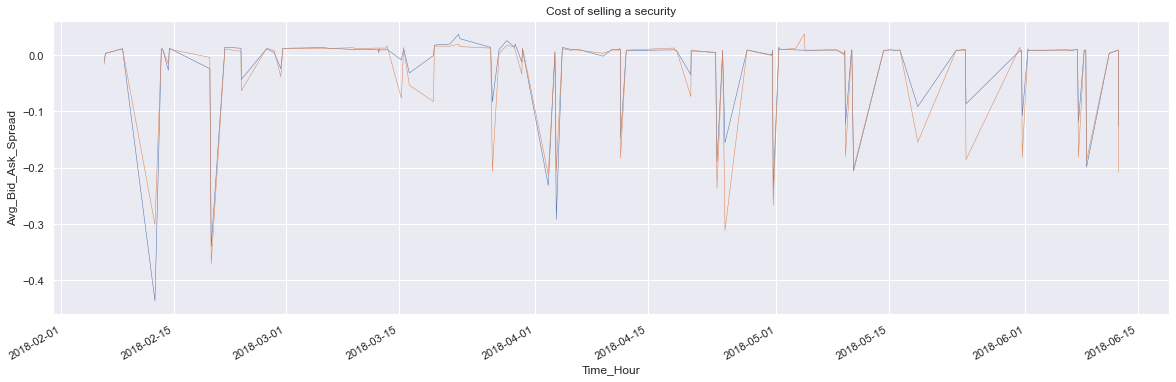

In [75]:
#Show actual vs predicted avg bid ask spread
plt.figure(figsize=(20,6))
Xt_test['Avg_Bid_Ask_Spread'].plot(linewidth=0.5)
Xt_test['pred_Avg_Bid_Ask_Spread'].plot(linewidth=0.5)
plt.ylabel('Avg_Bid_Ask_Spread'); plt.xlabel('Time_Hour'); plt.title('Cost of selling a security');
plt.show()
#Blue line is Avg_Bid_Ask_Spread and amber line is pred_Avg_Bid_Ask_Spread

In [76]:
mc.feature_importances(Xf_train, mod1)

Variable: NEW_L1_AskPrice_std  Importance: 0.058
Variable: NEW_L1_AskSize_std   Importance: 0.054
Variable: NEW_L1_BidPrice_std  Importance: 0.047
Variable: NEW_L2_AskPrice_std  Importance: 0.039
Variable: NEW_L2_BidPrice_std  Importance: 0.035
Variable: NEW_L1_BidSize_max   Importance: 0.031
Variable: NEW_L1_BidSize_std   Importance: 0.03
Variable: NEW_L10_BidSize_count Importance: 0.025
Variable: NEW_L1_AskSize_max   Importance: 0.025
Variable: NEW_L6_BidSize_count Importance: 0.024
Variable: NEW_L9_BidSize_count Importance: 0.024
Variable: NEW_L1_BidSize_sum   Importance: 0.022
Variable: NEW_L5_AskPrice_std  Importance: 0.021
Variable: NEW_L7_BidSize_count Importance: 0.019
Variable: NEW_L1_BidSize_count Importance: 0.019
Variable: NEW_L6_AskPrice_std  Importance: 0.019
Variable: NEW_L8_BidSize_count Importance: 0.016
Variable: NEW_L10_BidSize_sum  Importance: 0.016
Variable: NEW_L10_BidPrice_sum Importance: 0.016
Variable: NEW_L7_BidSize_sum   Importance: 0.015
Variable: NEW_L10_As

(['NEW_L1_BidPrice_std',
  'NumberOfTrades',
  'NEW_L1_AskPrice_std',
  'NEW_L1_BidSize_std',
  'NEW_L4_BidSize_sum',
  'NEW_L7_BidSize_count',
  'NEW_L1_AskSize_std',
  'NEW_L7_BidSize_sum',
  'NEW_L2_BidPrice_std',
  'NEW_L8_BidPrice_sum',
  'NEW_L6_BidSize_count',
  'NEW_L10_AskSize_sum',
  'NEW_L1_BidSize_sum',
  'NEW_L1_BidSize_count',
  'NEW_Normalised_Order_Book_Imbalance_sum',
  'NEW_L2_AskPrice_std',
  'NEW_L4_AskSize_sum',
  'NEW_L1_AskPrice_sum',
  'NEW_Normalised_Order_Book_Imbalance_std',
  'NEW_L8_AskSize_sum',
  'NEW_L8_BidSize_sum',
  'NEW_L10_BidSize_count',
  'NEW_L6_AskPrice_sum',
  'NEW_L3_BidSize_sum',
  'NEW_L9_AskSize_sum',
  'NEW_L10_AskPrice_sum',
  'day_of_week',
  'NEW_L1_AskSize_sum',
  'NEW_L1_BidSize_max',
  'NEW_L7_AskPrice_sum',
  'NEW_L5_AskSize_sum',
  'NEW_L9_BidSize_count',
  'NEW_L9_BidPrice_sum',
  'NEW_L2_AskSize_sum',
  'NEW_L7_BidPrice_sum',
  'NEW_L5_AskPrice_std',
  'NEW_L7_AskSize_sum',
  'NEW_L3_BidPrice_sum',
  'NEW_L1_AskSize_max',
  'NEW_

Variable: NEW_L1_AskPrice_std  Importance: 0.058
Variable: NEW_L1_AskSize_std   Importance: 0.054
Variable: NEW_L1_BidPrice_std  Importance: 0.047
Variable: NEW_L2_AskPrice_std  Importance: 0.039
Variable: NEW_L2_BidPrice_std  Importance: 0.035
Variable: NEW_L1_BidSize_max   Importance: 0.031
Variable: NEW_L1_BidSize_std   Importance: 0.03
Variable: NEW_L10_BidSize_count Importance: 0.025
Variable: NEW_L1_AskSize_max   Importance: 0.025
Variable: NEW_L6_BidSize_count Importance: 0.024
Variable: NEW_L9_BidSize_count Importance: 0.024
Variable: NEW_L1_BidSize_sum   Importance: 0.022
Variable: NEW_L5_AskPrice_std  Importance: 0.021
Variable: NEW_L7_BidSize_count Importance: 0.019
Variable: NEW_L1_BidSize_count Importance: 0.019
Variable: NEW_L6_AskPrice_std  Importance: 0.019
Variable: NEW_L8_BidSize_count Importance: 0.016
Variable: NEW_L10_BidSize_sum  Importance: 0.016
Variable: NEW_L10_BidPrice_sum Importance: 0.016
Variable: NEW_L7_BidSize_sum   Importance: 0.015
Variable: NEW_L10_As

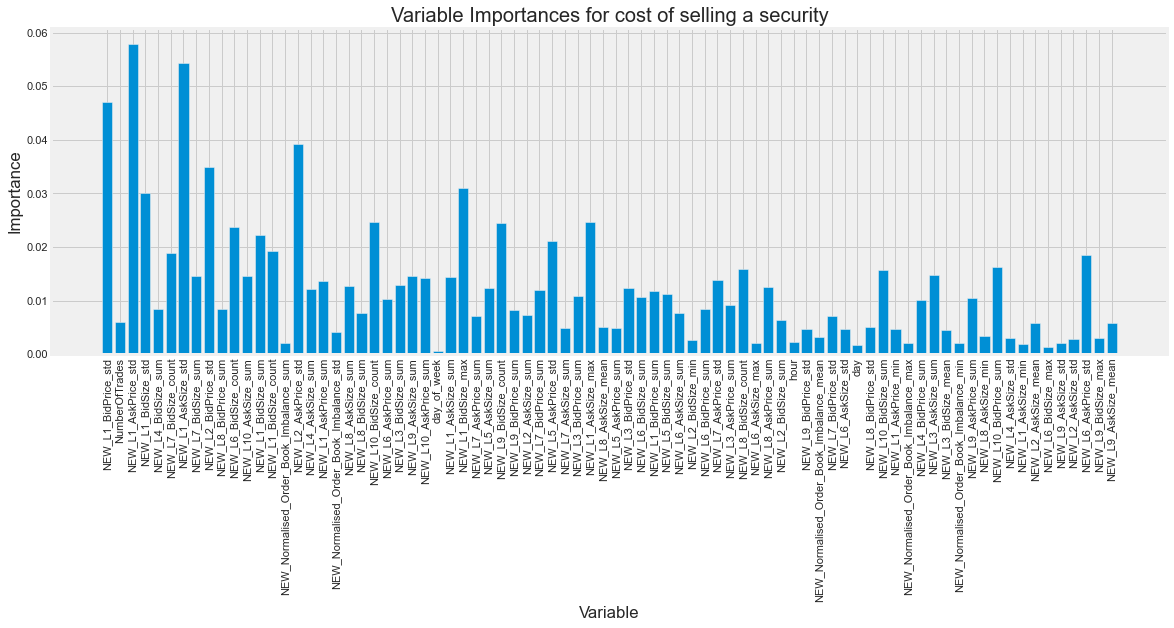

In [77]:
mc.feature_importances_viz(Xf_train, mod1)

#### Note 11
    1.The importance score show that to determine the cost of transaction/selling ABC's securities, the BidSize, AskPrice, AskSize and BizPrice at level 1 (maximum bid price and minimum Ask price) are the most important variable. Meaning the Level 1 data generally gives a very good indication to predict the cost of selling a security. 
That said, having the other level data helps to understand the change in ask price for example (as a standard deviation in this case)

    2. It equally shows the importance and significant corelation between the size/volume of ABC's security in trade and the cost.  
    
    3. Apart from the bid and ask sizes and prices, the number of trades within the hour is the next most important followed by the hour of the day the trade is made and the day of the week it is transacted. 
    
    4. In conlusion, to determine the cost of selling ABC securities, assest management should consider the bid and ask sizes and prices, the number of trades made within the hour, and the time of day when the trade is made (as well the day of the week). 
    
 This proves that the cost of selling a security is dependent on the price (bid and ask price), volume (bid, ask size) and time.
 

### Further explainability with shapley values

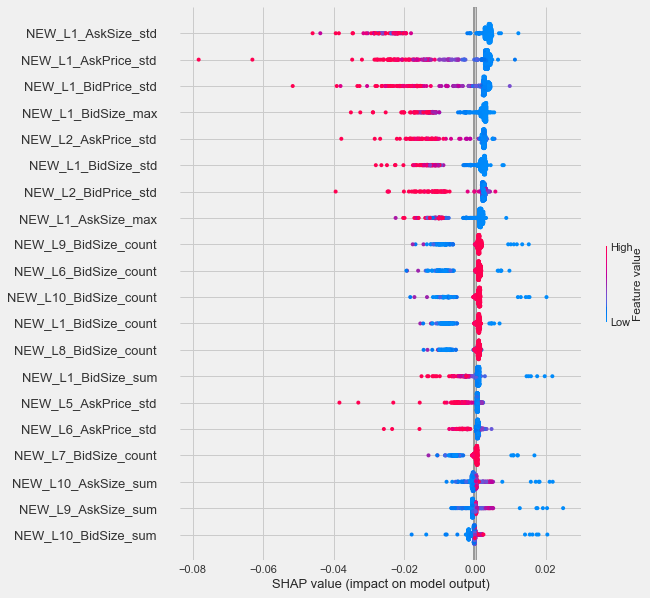

In [78]:
import shap
#Xb_train = Xf_train.iloc[:,:]
explainer = shap.TreeExplainer(mod1)
shap_values = explainer.shap_values(Xf_train)
ev = explainer.expected_value


#global
shap.summary_plot(shap_values, Xf_train)

In [79]:
#Local XAI
shap.initjs()
def shap_plot(j, ev, shap_val, S):
    p = shap.force_plot(ev, shap_val[j], S.iloc[[j]])
    return p

explainer_test = shap.TreeExplainer(mod1)
shap_values_test = explainer_test.shap_values(Xf_test)
ev_test = explainer_test.expected_value

In [80]:
Xt_test.head()

,Time_Hour_ID,NEW_L1_BidPrice_std,NumberOfTrades,NEW_L1_AskPrice_std,NEW_L1_BidSize_std,NEW_L4_BidSize_sum,NEW_L7_BidSize_count,NEW_L1_AskSize_std,NEW_L7_BidSize_sum,NEW_L2_BidPrice_std,NEW_L8_BidPrice_sum,NEW_L6_BidSize_count,NEW_L10_AskSize_sum,NEW_L1_BidSize_sum,NEW_L1_BidSize_count,NEW_Normalised_Order_Book_Imbalance_sum,NEW_L2_AskPrice_std,NEW_L4_AskSize_sum,NEW_L1_AskPrice_sum,NEW_Normalised_Order_Book_Imbalance_std,NEW_L8_AskSize_sum,NEW_L8_BidSize_sum,NEW_L10_BidSize_count,NEW_L6_AskPrice_sum,NEW_L3_BidSize_sum,NEW_L9_AskSize_sum,NEW_L10_AskPrice_sum,day_of_week,NEW_L1_AskSize_sum,NEW_L1_BidSize_max,NEW_L7_AskPrice_sum,NEW_L5_AskSize_sum,NEW_L9_BidSize_count,NEW_L9_BidPrice_sum,NEW_L2_AskSize_sum,NEW_L7_BidPrice_sum,NEW_L5_AskPrice_std,NEW_L7_AskSize_sum,NEW_L3_BidPrice_sum,NEW_L1_AskSize_max,NEW_L8_AskSize_mean,NEW_L5_AskPrice_sum,NEW_L3_BidPrice_std,NEW_L6_BidSize_sum,NEW_L1_BidPrice_sum,NEW_L5_BidSize_sum,NEW_L6_AskSize_sum,NEW_L2_BidSize_min,NEW_L6_BidPrice_sum,NEW_L7_AskPrice_std,NEW_L3_AskPrice_sum,NEW_L8_BidSize_count,NEW_L6_AskSize_max,NEW_L8_AskPrice_sum,NEW_L2_BidSize_sum,hour,NEW_L9_BidPrice_std,NEW_Normalised_Order_Book_Imbalance_mean,NEW_L7_BidPrice_std,NEW_L6_AskSize_std,day,NEW_L8_BidPrice_std,NEW_L10_BidSize_sum,NEW_L1_AskPrice_min,NEW_Normalised_Order_Book_Imbalance_max,NEW_L4_BidPrice_sum,NEW_L3_AskSize_sum,NEW_L3_BidSize_mean,NEW_Normalised_Order_Book_Imbalance_min,NEW_L9_AskPrice_sum,NEW_L8_AskSize_min,NEW_L10_BidPrice_sum,NEW_L4_AskSize_std,NEW_L1_AskSize_min,NEW_L2_AskSize_mean,NEW_L6_BidSize_max,NEW_L9_AskSize_std,NEW_L2_AskSize_std,NEW_L6_AskPrice_std,NEW_L9_BidSize_max,NEW_L9_AskSize_mean,Avg_Bid_Ask_Spread,pred_Avg_Bid_Ask_Spread
Time_Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-18 15:00:00+00:00,51815,1.146801,2008,0.943156,5.375787e+06,4.669202e+07,45,9.797069e+06,4.192259e+07,0.983651,1636.770340,45,3.659613e+07,8.868944e+07,45,-4.166618,0.748934,5.661739e+07,1615.789483,0.289086,3.870322e+07,3.837986e+07,45,1625.774710,3.090488e+07,3.706691e+07,1627.877559,4,1.602457e+08,2.774707e+07,1626.385516,5.092574e+07,45,1635.737370,5.759928e+07,1638.255631,0.514894,4.175484e+07,1640.678791,5.081682e+07,8.600714e+05,1624.520203,0.565886,3.503638e+07,1651.467180,3.165615e+07,4.397349e+07,436.000000,1638.230144,0.451283,1622.064599,45,2276893.364,1626.799389,2.714263e+07,15,0.380224,-0.092592,0.473872,717202.505007,18,0.419922,3.165378e+07,33.363636,0.510414,1640.876111,1.139980e+08,6.867750e+05,-0.524854,1627.346174,2.000000,1634.948710,1.110162e+06,26.545455,1.279984e+06,6136429.818,623448.848390,1.245785e+06,0.460929,3960921.636,8.237091e+05,-0.091512,-0.154684
2018-02-12 16:00:00+00:00,21216,1.427500,719,1.684196,4.919814e+06,2.208612e+07,42,8.332924e+06,3.056511e+07,0.829262,2212.860993,42,1.724286e+07,7.210806e+07,42,3.220547,1.191814,1.924895e+07,2179.405294,0.112655,1.677586e+07,3.184340e+07,42,2197.862075,2.671071e+07,1.274174e+07,2203.100299,0,1.214260e+08,2.754799e+07,2198.772248,1.451052e+07,42,2211.351502,1.573293e+07,2212.619216,0.775912,1.841964e+07,2219.754169,4.584149e+07,3.994252e+05,2197.126473,0.802051,3.149006e+07,2231.323371,2.782586e+07,1.908895e+07,2845.181818,2213.146457,0.723803,2196.074205,42,3915299.000,2200.407469,2.240769e+07,16,0.447197,0.076680,0.492004,622332.674751,12,0.512608,2.216524e+07,47.590909,0.290090,2216.945186,1.906284e+07,6.359693e+05,-0.175287,2202.755232,327.272727,2209.643652,3.426412e+05,9347.818182,3.745937e+05,6095232.182,325934.819030,3.506902e+05,0.758517,4290459.727,3.033749e+05,-0.436409,-0.301056
2018-03-21 09:00:00+00:00,3219,0.190642,5431,0.190989,1.899078e+05,4.778838e+07,60,1.844432e+05,5.301827e+07,0.190763,2598.472937,60,3.949207e+07,1.891128e+07,60,-0.418709,0.191286,5.153693e+07,2601.599420,0.068470,4.732597e+07,5.006335e+07,60,2602.898078,3.971538e+07,4.229511e+07,2604.138015,2,1.989320e+07,8.904016e+05,2603.148791,5.478897e+07,60,2598.169140,3.041551e+07,2598.734631,0.191276,5.243263e+0

In [83]:
#Testing a single trade for the key drivers behind the models decision
shap.initjs()
S = Xf_test.iloc[:,:]
shap_plot(1, ev_test, shap_values_test, S)

In [84]:
shap.initjs()
shap_plot(4, ev, shap_values, S)

### Recommendation
1. Model monitoring to monitor data and concept drift and determine when to retrain the model
2. Prediction can be saved as a file in a cloud bucket or a database server with a pipeline to a BI tool (like Tablaeu or Power BI) for the data to be injested and consumed/interacted with by stakeholders
3. Experiment with reducing the steps/number of features tested during the feature selction phase. It will be computationally intensive (for a large dataset) but more accurate. 
4. Hyperparameter tuning should be tested to obtain the optimal set of model algorithm training parameters
5. A boosting algorithm could be experimented with to see the effect it has on weaker learners.